In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from nbeats.kernels import NBEATSKernel
import time
import psutil

# Set a random seed for reproducibility
np.random.seed(42)

# Load and preprocess the new dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

for cancer_type in cancer_columns:
    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Normalize the target variable
    scaler = MinMaxScaler(feature_range=(0, 1))
    target_scaled = scaler.fit_transform(target)

    # Split the data into training and testing sets
    train_size = 15  # Number of years for training
    test_size = 5  # Number of years for testing

    train_data = target_scaled[:train_size]
    test_data = target_scaled[train_size:train_size + test_size]

    # Split into input and output variables
    X_train = train_data[:-1]
    y_train = train_data[1:]
    X_test = test_data[:-1]
    y_test = test_data[1:]

    # Define the N-BEATS model
    model = NBEATSKernel(input_dim=1, backcast_length=X_train.shape[0], forecast_length=1)

    print(f"Predicting {cancer_type} with N-BEATS:")

    start_time = time.time()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    training_time = time.time() - start_time

    cpu_percent = psutil.cpu_percent(interval=1)
    memory_info = psutil.virtual_memory()

    print(f"N-BEATS RMSE: {rmse}")
    print(f"N-BEATS MAE: {mae}")
    print(f"N-BEATS R-squared: {r2}")
    print(f"N-BEATS Training Time: {training_time} seconds")
    print(f"N-BEATS CPU Usage: {cpu_percent}%")
    print(f"N-BEATS Memory Usage: {memory_info.used / (1024 ** 2)} MB")
    print()


ModuleNotFoundError: No module named 'nbeats'

In [2]:
!pip install nbeats-keras



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install nbeats-pytorch



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from nbeats_pytorch.model import NBeats
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import time
import psutil

# Set a random seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Set a random seed for reproducibility
np.random.seed(42)

# Load and preprocess the new dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']


for cancer_type in cancer_columns:
    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Normalize the target variable
    scaler = MinMaxScaler(feature_range=(0, 1))
    target_scaled = scaler.fit_transform(target)

    # Split the data into training and testing sets
    train_size = 15  # Number of years for training
    test_size = 5  # Number of years for testing

    train_data = target_scaled[:train_size]
    test_data = target_scaled[train_size:train_size + test_size]

    # Split into input and output variables
    X_train = train_data[:-1]
    y_train = train_data[1:]
    X_test = test_data[:-1]
    y_test = test_data[1:]

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train).unsqueeze(2)
    y_train_tensor = torch.FloatTensor(y_train).unsqueeze(2)
    X_test_tensor = torch.FloatTensor(X_test).unsqueeze(2)
    y_test_tensor = torch.FloatTensor(y_test).unsqueeze(2)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

    # Define the N-BEATS model
    model = NBeats(input_dim=1, backcast_length=X_train.shape[0], forecast_length=1, stack_types=[('generic', 2)] * 30, device='cpu')

    print(f"Predicting {cancer_type} with N-BEATS:")

    start_time = time.time()
    
    # Use PyTorch DataLoader for training
    optimizer = optim.Adam(model.parameters())
    criterion = torch.nn.MSELoss()
    
    for epoch in range(100):
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            forecast = model(batch_X)
            loss = criterion(forecast, batch_y)
            loss.backward()
            optimizer.step()

    # Make predictions on the test set
    with torch.no_grad():
        predictions = model(X_test_tensor)

    mse = mean_squared_error(y_test, predictions.numpy())
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions.numpy())
    r2 = r2_score(y_test, predictions.numpy())
    training_time = time.time() - start_time

    cpu_percent = psutil.cpu_percent(interval=1)
    memory_info = psutil.virtual_memory()

    print(f"N-BEATS RMSE: {rmse}")
    print(f"N-BEATS MAE: {mae}")
    print(f"N-BEATS R-squared: {r2}")
    print(f"N-BEATS Training Time: {training_time} seconds")
    print(f"N-BEATS CPU Usage: {cpu_percent}%")
    print(f"N-BEATS Memory Usage: {memory_info.used / (1024 ** 2)} MB")
    print()


ImportError: cannot import name 'NBeats' from 'nbeats_pytorch.model' (C:\Users\Storm\anaconda3\lib\site-packages\nbeats_pytorch\model.py)

In [7]:
from nbeats_keras.model import NBEATSKeras


ImportError: cannot import name 'NBEATSKeras' from 'nbeats_keras.model' (C:\Users\Storm\anaconda3\lib\site-packages\nbeats_keras\model.py)

In [9]:
from nbeats_keras.model import NBeatsNet


In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from nbeats_keras.model import NBeatsNet
import time
import psutil

# Set a random seed for reproducibility
np.random.seed(42)

# Load and preprocess the new dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

for cancer_type in cancer_columns:
    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Normalize the target variable
    scaler = MinMaxScaler(feature_range=(0, 1))
    target_scaled = scaler.fit_transform(target)

    # Split the data into training and testing sets
    train_size = 15  # Number of years for training
    test_size = 5  # Number of years for testing

    train_data = target_scaled[:train_size]
    test_data = target_scaled[train_size:train_size + test_size]

    # Split into input and output variables
    X_train = train_data[:-1]
    y_train = train_data[1:]
    X_test = test_data[:-1]
    y_test = test_data[1:]

    # Define the N-BEATS model
    model = NBeatsNet(backcast_length=X_train.shape[0], forecast_length=1, stack_types=[NBeatsNet.GENERIC_BLOCK, NBeatsNet.GENERIC_BLOCK])

    print(f"Predicting {cancer_type} with N-BEATS:")

    start_time = time.time()
    model.fit(X_train, y_train, epochs=100, verbose=0)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    training_time = time.time() - start_time

    cpu_percent = psutil.cpu_percent(interval=1)
    memory_info = psutil.virtual_memory()

    print(f"N-BEATS RMSE: {rmse}")
    print(f"N-BEATS MAE: {mae}")
    print(f"N-BEATS R-squared: {r2}")
    print(f"N-BEATS Training Time: {training_time} seconds")
    print(f"N-BEATS CPU Usage: {cpu_percent}%")
    print(f"N-BEATS Memory Usage: {memory_info.used / (1024 ** 2)} MB")
    print()


Predicting Bladder with N-BEATS:


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from nbeats_keras.model import NBeatsNet
import time
import psutil

# Set a random seed for reproducibility
np.random.seed(42)

# Load and preprocess the new dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

for cancer_type in cancer_columns:
    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Normalize the target variable
    scaler = MinMaxScaler(feature_range=(0, 1))
    target_scaled = scaler.fit_transform(target)

    # Split the data into training and testing sets
    train_size = 15  # Number of years for training
    test_size = 5  # Number of years for testing

    train_data = target_scaled[:train_size]
    test_data = target_scaled[train_size:train_size + test_size]

    # Split into input and output variables
    X_train = train_data[:-1]
    y_train = train_data[1:]
    X_test = test_data[:-1]
    y_test = test_data[1:]

    # Define the N-BEATS model
    model = NBeatsNet(
        input_dim=1,
        backcast_length=X_train.shape[0],
        forecast_length=1,
        stack_types=[NBeatsNet.GENERIC_BLOCK, NBeatsNet.GENERIC_BLOCK]
    )
    
    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    print(f"Predicting {cancer_type} with N-BEATS:")

    start_time = time.time()
    model.fit(X_train, y_train, epochs=100, verbose=0)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    training_time = time.time() - start_time

    cpu_percent = psutil.cpu_percent(interval=1)
    memory_info = psutil.virtual_memory()

    print(f"N-BEATS RMSE: {rmse}")
    print(f"N-BEATS MAE: {mae}")
    print(f"N-BEATS R-squared: {r2}")
    print(f"N-BEATS Training Time: {training_time} seconds")
    print(f"N-BEATS CPU Usage: {cpu_percent}%")
    print(f"N-BEATS Memory Usage: {memory_info.used / (1024 ** 2)} MB")
    print()


Predicting Bladder with N-BEATS:


ValueError: in user code:

    File "C:\Users\Storm\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Storm\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Storm\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Storm\anaconda3\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Storm\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Storm\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'forecast' (type Functional).
    
    Input 0 of layer "0/0/generic/d1" is incompatible with the layer: expected axis -1 of input shape to have value 14, but received input with shape (None, 1)
    
    Call arguments received by layer 'forecast' (type Functional):
      • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
      • training=True
      • mask=None


In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from nbeats_keras.model import NBeatsNet
import time
import psutil

# Set a random seed for reproducibility
np.random.seed(42)

# Load and preprocess the new dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
})

# Select the target cancer type column as the target variable
cancer_type = 'Bladder'
target = data[cancer_type].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 15  # Number of years for training
test_size = 5  # Number of years for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size + test_size]

# Split into input and output variables
X_train = train_data[:-1]
y_train = train_data[1:]
X_test = test_data[:-1]
y_test = test_data[1:]

# Reshape the input data for N-BEATS
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the N-BEATS model
model = NBeatsNet(
    input_dim=1,
    backcast_length=X_train.shape[0],
    forecast_length=1,
    stack_types=[NBeatsNet.GENERIC_BLOCK, NBeatsNet.GENERIC_BLOCK]
)

# Compile the model
model.compile(optimizer='adam', loss='mse')

print(f"Predicting {cancer_type} with N-BEATS:")

start_time = time.time()
model.fit(X_train_reshaped, y_train, epochs=100, verbose=0)
predictions = model.predict(X_test_reshaped)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
training_time = time.time() - start_time

cpu_percent = psutil.cpu_percent(interval=1)
memory_info = psutil.virtual_memory()

print(f"N-BEATS RMSE: {rmse}")
print(f"N-BEATS MAE: {mae}")
print(f"N-BEATS R-squared: {r2}")
print(f"N-BEATS Training Time: {training_time} seconds")
print(f"N-BEATS CPU Usage: {cpu_percent}%")
print(f"N-BEATS Memory Usage: {memory_info.used / (1024 ** 2)} MB")
print()


Predicting Bladder with N-BEATS:


ValueError: in user code:

    File "C:\Users\Storm\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Storm\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Storm\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Storm\anaconda3\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Storm\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Storm\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "forecast" is incompatible with the layer: expected shape=(None, 14, 1), found shape=(None, 1, 1)


In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from nbeats_keras.model import NBeatsNet
import time
import psutil

# Set a random seed for reproducibility
np.random.seed(42)

# Load and preprocess the new dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

for cancer_type in cancer_columns:
    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Normalize the target variable
    scaler = MinMaxScaler(feature_range=(0, 1))
    target_scaled = scaler.fit_transform(target)

    # Split the data into training and testing sets
    train_size = 15  # Number of years for training
    test_size = 5  # Number of years for testing

    train_data = target_scaled[:train_size]
    test_data = target_scaled[train_size:train_size + test_size]

    # Split into input and output variables
    X_train = train_data[:-1]
    y_train = train_data[1:]
    X_test = test_data[:-1]
    y_test = test_data[1:]

    # Define the N-BEATS model with correct input shape
    model = NBeatsNet(
        input_dim=1,
        backcast_length=X_train.shape[0],
        forecast_length=1,
        stack_types=[NBeatsNet.GENERIC_BLOCK, NBeatsNet.GENERIC_BLOCK],
        thetas_dim=(4, 4)
    )
    
    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    print(f"Predicting {cancer_type} with N-BEATS:")

    start_time = time.time()
    model.fit(X_train, y_train, epochs=100, verbose=0)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    training_time = time.time() - start_time

    cpu_percent = psutil.cpu_percent(interval=1)
    memory_info = psutil.virtual_memory()

    print(f"N-BEATS RMSE: {rmse}")
    print(f"N-BEATS MAE: {mae}")
    print(f"N-BEATS R-squared: {r2}")
    print(f"N-BEATS Training Time: {training_time} seconds")
    print(f"N-BEATS CPU Usage: {cpu_percent}%")
    print(f"N-BEATS Memory Usage: {memory_info.used / (1024 ** 2)} MB")
    print()


Predicting Bladder with N-BEATS:


ValueError: in user code:

    File "C:\Users\Storm\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Storm\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Storm\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Storm\anaconda3\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Storm\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Storm\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'forecast' (type Functional).
    
    Input 0 of layer "0/0/generic/d1" is incompatible with the layer: expected axis -1 of input shape to have value 14, but received input with shape (None, 1)
    
    Call arguments received by layer 'forecast' (type Functional):
      • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
      • training=True
      • mask=None


In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mean_squared_error as keras_mean_squared_error

# Define the N-BEATS block
class NBEATSBlock(tf.keras.layers.Layer):
    def __init__(self, input_dim, hidden_dim, forecast_steps):
        super(NBEATSBlock, self).__init__()
        self.fc1 = Dense(hidden_dim, activation='relu')
        self.fc2 = Dense(forecast_steps)

    def call(self, x):
        x = self.fc1(x)
        forecast = self.fc2(x)
        return forecast

# Function to train and predict using N-BEATS
def train_and_predict_nbeats(target, forecast_steps=1, num_blocks=4, hidden_dim=64, num_epochs=100):
    input_dim = target.shape[1]

    # Prepare the data for N-BEATS
    sequences = []
    targets = []
    for i in range(len(target) - forecast_steps):
        sequences.append(target[i:i+forecast_steps])
        targets.append(target[i+forecast_steps])
    sequences, targets = np.array(sequences), np.array(targets)

    # Instantiate the N-BEATS model
    model = Sequential([
        Input(shape=(forecast_steps, input_dim)),
        *[NBEATSBlock(input_dim, hidden_dim, forecast_steps) for _ in range(num_blocks)],
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss=keras_mean_squared_error)

    # Training loop
    model.fit(sequences.reshape(-1, forecast_steps, input_dim), targets, epochs=num_epochs, verbose=0)

    # Make predictions
    test_input = target[-forecast_steps:]
    forecast = model.predict(test_input.reshape(1, forecast_steps, input_dim))

    return forecast.flatten()

# Load and preprocess the cancer dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Initialize lists to store evaluation metrics
eval_metrics = []

# Perform the same model evaluation for each cancer type with missing data
for cancer_type in cancer_columns:
    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Handle missing values by imputing with the mean of the available values
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Train and evaluate N-BEATS model
    forecast = train_and_predict_nbeats(target_scaled)

    # Evaluate N-BEATS model
    print(f"\nEvaluation for Cancer Type: {cancer_type}")
    print("True Values:", target_scaled[-1])
    print("Forecasted Values:", forecast)

    # Calculate and store metrics
    mse = mean_squared_error(target_scaled[-1], forecast)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(target_scaled[-1], forecast)
    
    # Handle R-squared being 'nan'
    r2 = r2_score(target_scaled[-1], forecast)
    r2 = 0.0 if np.isnan(r2) else r2

    model_name = "N-BEATS"
    eval_metrics.append((cancer_type, model_name, rmse, mae, r2))

# Print the evaluation metrics for N-BEATS model
for metric in eval_metrics:
    cancer_type, model_name, rmse, mae, r2 = metric
    print(f"\n{cancer_type} - {model_name} RMSE: {rmse:.5f}, MAE: {mae:.5f}, R-squared: {r2:.5f}")


1/1 [==============================] - 1s 561ms/step

Evaluation for Cancer Type: Bladder
True Values: [-1.58177973]
Forecasted Values: [-0.92846894]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 427ms/step

Evaluation for Cancer Type: Brain
True Values: [-1.68605891]
Forecasted Values: [-1.1523503]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 496ms/step

Evaluation for Cancer Type: Breast
True Values: [-0.05297525]
Forecasted Values: [0.4945439]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 482ms/step

Evaluation for Cancer Type: Bronchus_Lung
True Values: [-0.62679353]
Forecasted Values: [-0.626185]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 480ms/step

Evaluation for Cancer Type: Colorectal
True Values: [-1.11773919]
Forecasted Values: [-0.9040628]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 483ms/step

Evaluation for Cancer Type: Leukemia
True Values: [0.40081007]
Forecasted Values: [0.42536107]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 469ms/step

Evaluation for Cancer Type: Non_Hodgkins_Lymphoma
True Values: [-0.02640739]
Forecasted Values: [0.31646144]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 468ms/step

Evaluation for Cancer Type: Stomach
True Values: [-1.54728032]
Forecasted Values: [-1.1741831]

Bladder - N-BEATS RMSE: 0.65331, MAE: 0.65331, R-squared: 0.00000

Brain - N-BEATS RMSE: 0.53371, MAE: 0.53371, R-squared: 0.00000

Breast - N-BEATS RMSE: 0.54752, MAE: 0.54752, R-squared: 0.00000

Bronchus_Lung - N-BEATS RMSE: 0.00061, MAE: 0.00061, R-squared: 0.00000

Colorectal - N-BEATS RMSE: 0.21368, MAE: 0.21368, R-squared: 0.00000

Leukemia - N-BEATS RMSE: 0.02455, MAE: 0.02455, R-squared: 0.00000

Non_Hodgkins_Lymphoma - N-BEATS RMSE: 0.34287, MAE: 0.34287, R-squared: 0.00000

Stomach - N-BEATS RMSE: 0.37310, MAE: 0.37310, R-squared: 0.00000


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [15]:
# Evaluate N-BEATS model
eval_metrics = []

for cancer_type in cancer_columns:
    target = data[cancer_type].values.reshape(-1, 1)
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Train and evaluate N-BEATS model
    forecast = train_and_predict_nbeats(target_scaled)

    # Inverse transform the scaled values to the original scale
    forecast_original_scale = scaler.inverse_transform(forecast.reshape(-1, 1)).flatten()
    target_original_scale = scaler.inverse_transform(target_scaled[-1].reshape(-1, 1)).flatten()

    # Calculate R-squared on the original scale
    r2_original_scale = r2_score(target_original_scale, forecast_original_scale)

    # Calculate differences between true and predicted values
    differences = target_original_scale - forecast_original_scale

    model_name = "N-BEATS"
    eval_metrics.append((cancer_type, model_name, r2_original_scale, differences))

# Print the evaluation metrics for N-BEATS model
for metric in eval_metrics:
    cancer_type, model_name, r2_original_scale, differences = metric
    print(f"\n{cancer_type} - {model_name} R-squared (Original Scale): {r2_original_scale:.5f}")
    print(f"Differences (True - Predicted): {differences}")


1/1 [==============================] - 0s 459ms/step


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 474ms/step


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 465ms/step


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 467ms/step


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 458ms/step


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 465ms/step


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 470ms/step


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 490ms/step

Bladder - N-BEATS R-squared (Original Scale): nan
Differences (True - Predicted): [-6.65209389]

Brain - N-BEATS R-squared (Original Scale): nan
Differences (True - Predicted): [-3.37323189]

Breast - N-BEATS R-squared (Original Scale): nan
Differences (True - Predicted): [-27.59487915]

Bronchus_Lung - N-BEATS R-squared (Original Scale): nan
Differences (True - Predicted): [0.33301544]

Colorectal - N-BEATS R-squared (Original Scale): nan
Differences (True - Predicted): [-4.32065392]

Leukemia - N-BEATS R-squared (Original Scale): nan
Differences (True - Predicted): [4.57065201]

Non_Hodgkins_Lymphoma - N-BEATS R-squared (Original Scale): nan
Differences (True - Predicted): [-3.78511047]

Stomach - N-BEATS R-squared (Original Scale): nan
Differences (True - Predicted): [-2.50745869]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [16]:
# Evaluate N-BEATS model
eval_metrics = []

for cancer_type in cancer_columns:
    target = data[cancer_type].values.reshape(-1, 1)
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Train and evaluate N-BEATS model
    forecast = train_and_predict_nbeats(target_scaled)

    # Inverse transform the scaled values to the original scale
    forecast_original_scale = scaler.inverse_transform(forecast.reshape(-1, 1)).flatten()
    target_original_scale = scaler.inverse_transform(target_scaled[-1].reshape(-1, 1)).flatten()

    # Calculate R-squared on the original scale
    r2_original_scale = r2_score(target_original_scale, forecast_original_scale)

    # Set R-squared to 0.0 when it's nan
    r2_original_scale = 0.0 if np.isnan(r2_original_scale) else r2_original_scale

    # Calculate differences between true and predicted values
    differences = target_original_scale - forecast_original_scale

    model_name = "N-BEATS"
    eval_metrics.append((cancer_type, model_name, r2_original_scale, differences))

# Print the evaluation metrics for N-BEATS model
for metric in eval_metrics:
    cancer_type, model_name, r2_original_scale, differences = metric
    print(f"\n{cancer_type} - {model_name} R-squared (Original Scale): {r2_original_scale:.5f}")
    print(f"Differences (True - Predicted): {differences}")


1/1 [==============================] - 1s 572ms/step


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 304ms/step


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 208ms/step


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 479ms/step


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 461ms/step


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 431ms/step


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 460ms/step


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 202ms/step

Bladder - N-BEATS R-squared (Original Scale): 0.00000
Differences (True - Predicted): [-6.9391098]

Brain - N-BEATS R-squared (Original Scale): 0.00000
Differences (True - Predicted): [-2.8171711]

Breast - N-BEATS R-squared (Original Scale): 0.00000
Differences (True - Predicted): [-25.85668945]

Bronchus_Lung - N-BEATS R-squared (Original Scale): 0.00000
Differences (True - Predicted): [-0.49567795]

Colorectal - N-BEATS R-squared (Original Scale): 0.00000
Differences (True - Predicted): [-6.3132534]

Leukemia - N-BEATS R-squared (Original Scale): 0.00000
Differences (True - Predicted): [5.39068985]

Non_Hodgkins_Lymphoma - N-BEATS R-squared (Original Scale): 0.00000
Differences (True - Predicted): [-3.14742661]

Stomach - N-BEATS R-squared (Original Scale): 0.00000
Differences (True - Predicted): [-1.97751808]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [17]:
def train_and_predict_nbeats(target, forecast_steps=1, num_blocks=4, hidden_dim=64, num_epochs=100):
    input_dim = target.shape[1]

    # Prepare the data for N-BEATS
    sequences = []
    targets = []
    for i in range(len(target) - forecast_steps):
        sequences.append(target[i:i+forecast_steps])
        targets.append(target[i+forecast_steps])
    sequences, targets = np.array(sequences), np.array(targets)

    # Instantiate the N-BEATS model
    model = Sequential([
        Input(shape=(forecast_steps, input_dim)),
        *[NBEATSBlock(input_dim, hidden_dim, forecast_steps) for _ in range(num_blocks)],
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss=keras_mean_squared_error)

    # Training loop
    model.fit(sequences.reshape(-1, forecast_steps, input_dim), targets, epochs=num_epochs, verbose=0)

    # Make predictions
    test_input = target[-forecast_steps:]
    forecast = model.predict(test_input.reshape(1, forecast_steps, input_dim))

    # Handle potential nan values in the forecast
    forecast = np.nan_to_num(forecast, nan=np.nanmean(forecast))

    return forecast.flatten()


In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mean_squared_error as keras_mean_squared_error

# Define the N-BEATS block
class NBEATSBlock(tf.keras.layers.Layer):
    def __init__(self, input_dim, hidden_dim, forecast_steps):
        super(NBEATSBlock, self).__init__()
        self.fc1 = Dense(hidden_dim, activation='relu')
        self.fc2 = Dense(forecast_steps)

    def call(self, x):
        x = self.fc1(x)
        forecast = self.fc2(x)
        return forecast

# Function to train and predict using N-BEATS
def train_and_predict_nbeats(target, forecast_steps=1, num_blocks=4, hidden_dim=64, num_epochs=100):
    input_dim = target.shape[1]

    # Prepare the data for N-BEATS
    sequences = []
    targets = []
    for i in range(len(target) - forecast_steps):
        sequences.append(target[i:i+forecast_steps])
        targets.append(target[i+forecast_steps])
    sequences, targets = np.array(sequences), np.array(targets)

    # Instantiate the N-BEATS model
    model = Sequential([
        Input(shape=(forecast_steps, input_dim)),
        *[NBEATSBlock(input_dim, hidden_dim, forecast_steps) for _ in range(num_blocks)],
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss=keras_mean_squared_error)

    # Training loop
    model.fit(sequences.reshape(-1, forecast_steps, input_dim), targets, epochs=num_epochs, verbose=0)

    # Make predictions
    test_input = target[-forecast_steps:]
    forecast = model.predict(test_input.reshape(1, forecast_steps, input_dim))

    # Handle potential nan values in the forecast
    forecast = np.nan_to_num(forecast, nan=np.nanmean(forecast))

    return forecast.flatten()

# Load and preprocess the cancer dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Initialize lists to store evaluation metrics
eval_metrics = []

# Perform the same model evaluation for each cancer type with missing data
for cancer_type in cancer_columns:
    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Handle missing values by imputing with the mean of the available values
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Train and evaluate N-BEATS model
    forecast = train_and_predict_nbeats(target_scaled)

    # Evaluate N-BEATS model
    print(f"\nEvaluation for Cancer Type: {cancer_type}")
    print("True Values (Scaled):", target_scaled[-1])
    print("Forecasted Values (Scaled):", forecast)

    # Inverse transform to get values in the original scale
    forecast_original_scale = scaler.inverse_transform(forecast.reshape(-1, 1)).flatten()
    target_original_scale = scaler.inverse_transform(target_scaled[-1].reshape(-1, 1)).flatten()

    # Calculate and store metrics
    mse = mean_squared_error(target_original_scale, forecast_original_scale)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(target_original_scale, forecast_original_scale)
    
    # Handle R-squared being 'nan'
    r2 = r2_score(target_original_scale, forecast_original_scale)
    r2 = 0.0 if np.isnan(r2) else r2

    model_name = "N-BEATS"
    eval_metrics.append((cancer_type, model_name, rmse, mae, r2))

# Print the evaluation metrics for N-BEATS model
for metric in eval_metrics:
    cancer_type, model_name, rmse, mae, r2 = metric
    print(f"\n{cancer_type} - {model_name} RMSE: {rmse:.5f}, MAE: {mae:.5f}, R-squared: {r2:.5f}")


1/1 [==============================] - 0s 472ms/step

Evaluation for Cancer Type: Bladder
True Values (Scaled): [-1.58177973]
Forecasted Values (Scaled): [-1.0046294]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 1s 564ms/step

Evaluation for Cancer Type: Brain
True Values (Scaled): [-1.68605891]
Forecasted Values (Scaled): [-1.468199]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 449ms/step

Evaluation for Cancer Type: Breast
True Values (Scaled): [-0.05297525]
Forecasted Values (Scaled): [0.49549583]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 471ms/step

Evaluation for Cancer Type: Bronchus_Lung
True Values (Scaled): [-0.62679353]
Forecasted Values (Scaled): [-0.2902289]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 455ms/step

Evaluation for Cancer Type: Colorectal
True Values (Scaled): [-1.11773919]
Forecasted Values (Scaled): [-0.55215704]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 472ms/step

Evaluation for Cancer Type: Leukemia
True Values (Scaled): [0.40081007]
Forecasted Values (Scaled): [0.6454744]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 475ms/step

Evaluation for Cancer Type: Non_Hodgkins_Lymphoma
True Values (Scaled): [-0.02640739]
Forecasted Values (Scaled): [0.37163967]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 460ms/step

Evaluation for Cancer Type: Stomach
True Values (Scaled): [-1.54728032]
Forecasted Values (Scaled): [-1.2857814]

Bladder - N-BEATS RMSE: 6.25498, MAE: 6.25498, R-squared: 0.00000

Brain - N-BEATS RMSE: 2.70731, MAE: 2.70731, R-squared: 0.00000

Breast - N-BEATS RMSE: 26.62289, MAE: 26.62289, R-squared: 0.00000

Bronchus_Lung - N-BEATS RMSE: 9.20507, MAE: 9.20507, R-squared: 0.00000

Colorectal - N-BEATS RMSE: 8.02380, MAE: 8.02380, R-squared: 0.00000

Leukemia - N-BEATS RMSE: 3.05212, MAE: 3.05212, R-squared: 0.00000

Non_Hodgkins_Lymphoma - N-BEATS RMSE: 4.30666, MAE: 4.30666, R-squared: 0.00000

Stomach - N-BEATS RMSE: 2.24536, MAE: 2.24536, R-squared: 0.00000


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mean_squared_error as keras_mean_squared_error

# Define the N-BEATS block
class NBEATSBlock(tf.keras.layers.Layer):
    def __init__(self, input_dim, hidden_dim, forecast_steps):
        super(NBEATSBlock, self).__init__()
        self.fc1 = Dense(hidden_dim, activation='relu')
        self.fc2 = Dense(forecast_steps)

    def call(self, x):
        x = self.fc1(x)
        forecast = self.fc2(x)
        return forecast

# Function to train and predict using N-BEATS
def train_and_predict_nbeats(target, forecast_steps=1, num_blocks=4, hidden_dim=64, num_epochs=100):
    input_dim = target.shape[1]

    # Prepare the data for N-BEATS
    sequences = []
    targets = []
    for i in range(len(target) - forecast_steps):
        sequences.append(target[i:i+forecast_steps])
        targets.append(target[i+forecast_steps])
    sequences, targets = np.array(sequences), np.array(targets)

    # Instantiate the N-BEATS model
    model = Sequential([
        Input(shape=(forecast_steps, input_dim)),
        *[NBEATSBlock(input_dim, hidden_dim, forecast_steps) for _ in range(num_blocks)],
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss=keras_mean_squared_error)

    # Training loop
    model.fit(sequences.reshape(-1, forecast_steps, input_dim), targets, epochs=num_epochs, verbose=0)

    # Make predictions
    test_input = target[-forecast_steps:]
    forecast = model.predict(test_input.reshape(1, forecast_steps, input_dim))

    # Handle potential nan values in the forecast
    forecast = np.nan_to_num(forecast, nan=np.nanmean(forecast))

    return forecast.flatten()

# Load and preprocess the cancer dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Initialize lists to store evaluation metrics
eval_metrics = []

# Perform the same model evaluation for each cancer type with missing data
for cancer_type in cancer_columns:
    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Handle missing values by imputing with the mean of the available values
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Train and evaluate N-BEATS model
    forecast = train_and_predict_nbeats(target_scaled)

    # Evaluate N-BEATS model
    print(f"\nEvaluation for Cancer Type: {cancer_type}")
    print("True Values (Original Scale):", target[-1])
    print("Forecasted Values (Original Scale):", forecast)

    # Calculate and store metrics
    mse = mean_squared_error(target[-1], forecast)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(target[-1], forecast)
    
    # Handle R-squared being 'nan'
    r2 = r2_score(target[-1], forecast)
    r2 = 0.0 if np.isnan(r2) else r2

    model_name = "N-BEATS"
    eval_metrics.append((cancer_type, model_name, rmse, mae, r2))

# Print the evaluation metrics for N-BEATS model
for metric in eval_metrics:
    cancer_type, model_name, rmse, mae, r2 = metric
    print(f"\n{cancer_type} - {model_name} RMSE: {rmse:.5f}, MAE: {mae:.5f}, R-squared: {r2:.5f}")


1/1 [==============================] - 0s 464ms/step

Evaluation for Cancer Type: Bladder
True Values (Original Scale): [13]
Forecasted Values (Original Scale): [-0.9123618]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 1s 569ms/step

Evaluation for Cancer Type: Brain
True Values (Original Scale): [9]
Forecasted Values (Original Scale): [-1.1022822]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 461ms/step

Evaluation for Cancer Type: Breast
True Values (Original Scale): [133]
Forecasted Values (Original Scale): [0.47613394]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 467ms/step

Evaluation for Cancer Type: Bronchus_Lung
True Values (Original Scale): [39]
Forecasted Values (Original Scale): [-0.6111796]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 463ms/step

Evaluation for Cancer Type: Colorectal
True Values (Original Scale): [21]
Forecasted Values (Original Scale): [-0.5329666]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 480ms/step

Evaluation for Cancer Type: Leukemia
True Values (Original Scale): [46]
Forecasted Values (Original Scale): [0.09727073]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 337ms/step

Evaluation for Cancer Type: Non_Hodgkins_Lymphoma
True Values (Original Scale): [30]
Forecasted Values (Original Scale): [0.31355944]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 [==============================] - 0s 288ms/step

Evaluation for Cancer Type: Stomach
True Values (Original Scale): [12]
Forecasted Values (Original Scale): [-1.4317541]

Bladder - N-BEATS RMSE: 13.91236, MAE: 13.91236, R-squared: 0.00000

Brain - N-BEATS RMSE: 10.10228, MAE: 10.10228, R-squared: 0.00000

Breast - N-BEATS RMSE: 132.52387, MAE: 132.52387, R-squared: 0.00000

Bronchus_Lung - N-BEATS RMSE: 39.61118, MAE: 39.61118, R-squared: 0.00000

Colorectal - N-BEATS RMSE: 21.53297, MAE: 21.53297, R-squared: 0.00000

Leukemia - N-BEATS RMSE: 45.90273, MAE: 45.90273, R-squared: 0.00000

Non_Hodgkins_Lymphoma - N-BEATS RMSE: 29.68644, MAE: 29.68644, R-squared: 0.00000

Stomach - N-BEATS RMSE: 13.43175, MAE: 13.43175, R-squared: 0.00000


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional, GRU
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import time

# Set a random seed for reproducibility
np.random.seed(42)

# Load and preprocess the new dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=['Cancer_Type', 'Model', 'RMSE', 'MAE', 'R_Squared', 'Training_Time'])

for cancer_type in cancer_columns:
    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Normalize the target variable
    scaler = MinMaxScaler(feature_range=(0, 1))
    target_scaled = scaler.fit_transform(target)

    # Split the data into training and testing sets
    train_size = 15  # Number of years for training
    test_size = 5  # Number of years for testing

    train_data = target_scaled[:train_size]
    test_data = target_scaled[train_size:train_size + test_size]

    # Split into input and output variables
    X_train = train_data[:-1]
    y_train = train_data[1:]
    X_test = test_data[:-1]
    y_test = test_data[1:]

    # Define the regression models to be evaluated
    models = [
        LinearRegression(),
        SVR(),
        AdaBoostRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor()
    ]

    print(f"Predicting {cancer_type}:")

    # Train and evaluate each model
    for model in models:
        start_time = time.time()
        model.fit(X_train, y_train.ravel())
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        training_time = time.time() - start_time

        model_name = model.__class__.__name__
        print(f"{model_name} RMSE: {rmse}")
        print(f"{model_name} MAE: {mae}")
        print(f"{model_name} R-squared: {r2}")
        print(f"{model_name} Training Time: {training_time}")
        print()

        # Append results to the DataFrame
        results_df = results_df.append({
            'Cancer_Type': cancer_type,
            'Model': model_name,
            'RMSE': rmse,
            'MAE': mae,
            'R_Squared': r2,
            'Training_Time': training_time
        }, ignore_index=True)

    # Define the deep learning models to be evaluated
    deep_learning_models = [
        (Sequential([LSTM(32, input_shape=(X_train.shape[1], 1)), Dense(1)]), "LSTM"),
        (Sequential([LSTM(32, input_shape=(X_train.shape[1], 1), return_sequences=True), LSTM(32), Dense(1)]), "Stacked LSTM"),
        (Sequential([Bidirectional(LSTM(32), input_shape=(X_train.shape[1], 1)), Dense(1)]), "Bidirectional LSTM"),
        (Sequential([GRU(32, input_shape=(X_train.shape[1], 1)), Dense(1)]), "GRU")
    ]

    # Train and evaluate each deep learning model
    for model, model_name in deep_learning_models:
        start_time = time.time()
        model.compile(loss='mse', optimizer='adam')
        model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=1, verbose=0)
        predictions = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        training_time = time.time() - start_time

        print(f"{model_name} RMSE: {rmse}")
        print(f"{model_name} MAE: {mae}")
        print(f"{model_name} R-squared: {r2}")
        print(f"{model_name} Training Time: {training_time}")
        print()

        # Append results to the DataFrame
        results_df = results_df.append({
            'Cancer_Type': cancer_type,
            'Model': model_name,
            'RMSE': rmse,
            'MAE': mae,
            'R_Squared': r2,
            'Training_Time': training_time
        }, ignore_index=True)

    # Exponential Smoothing
    start_time = time.time()
    ets_model = ExponentialSmoothing(y_train.ravel())
    ets_fit = ets_model.fit()
    ets_predictions = ets_fit.forecast(len(y_test))
    ets_mse = mean_squared_error(y_test, ets_predictions)
    ets_rmse = np.sqrt(ets_mse)
    ets_mae = mean_absolute_error(y_test, ets_predictions)
    ets_r2 = r2_score(y_test, ets_predictions)
    ets_training_time = time.time() - start_time
    print(f"ETS RMSE: {ets_rmse}")
    print(f"ETS MAE: {ets_mae}")
    print(f"ETS R-squared: {ets_r2}")
    print(f"ETS Training Time: {ets_training_time}")
    print()

    # Append results to the DataFrame
    results_df = results_df.append({
        'Cancer_Type': cancer_type,
        'Model': 'ETS',
        'RMSE': ets_rmse,
        'MAE': ets_mae,
        'R_Squared': ets_r2,
        'Training_Time': ets_training_time
    }, ignore_index=True)

# Save the results DataFrame to a CSV file
results_df.to_csv('cancer_prediction_results.csv', index=False)


C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Predicting Bladder:
LinearRegression RMSE: 0.16947225912860753
LinearRegression MAE: 0.15966585122919902
LinearRegression R-squared: -1.8732813633576475
LinearRegression Training Time: 0.016546964645385742

SVR RMSE: 0.3216301118166203
SVR MAE: 0.28612671502200715
SVR R-squared: -9.348903129751639
SVR Training Time: 0.014745473861694336

AdaBoostRegressor RMSE: 0.43547046659940075
AdaBoostRegressor MAE: 0.3698979591836734
AdaBoostRegressor R-squared: -17.971354166666668
AdaBoostRegressor Training Time: 0.09253597259521484



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


RandomForestRegressor RMSE: 0.3024082380929263
RandomForestRegressor MAE: 0.2595615889212828
RandomForestRegressor R-squared: -8.14888469424957
RandomForestRegressor Training Time: 0.10313963890075684

GradientBoostingRegressor RMSE: 0.4371912272933369
GradientBoostingRegressor MAE: 0.374490586481636
GradientBoostingRegressor R-squared: -18.121580929276355
GradientBoostingRegressor Training Time: 0.04928421974182129



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 564ms/step
LSTM RMSE: 0.18027744582277438
LSTM MAE: 0.16539095266132936
LSTM R-squared: -2.2513499121330196
LSTM Training Time: 2.822669506072998



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 977ms/step
Stacked LSTM RMSE: 0.16646945360862242
Stacked LSTM MAE: 0.15634711755781755
Stacked LSTM R-squared: -1.7723625684330284
Stacked LSTM Training Time: 5.062174320220947



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 1s/step
Bidirectional LSTM RMSE: 0.1655710066855432
Bidirectional LSTM MAE: 0.15632188989191637
Bidirectional LSTM R-squared: -1.742518065413706
Bidirectional LSTM Training Time: 5.179154634475708



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 458ms/step
GRU RMSE: 0.15705915349296454
GRU MAE: 0.14807728601961717
GRU R-squared: -1.4677855853299913
GRU Training Time: 2.7674214839935303

ETS RMSE: 0.10116531082811123
ETS MAE: 0.08163265306122447
ETS R-squared: -0.023868445666292315
ETS Training Time: 0.013028860092163086

Predicting Brain:
LinearRegression RMSE: 0.2404257473581802
LinearRegression MAE: 0.20894651375215667
LinearRegression R-squared: -9.76749718874789
LinearRegression Training Time: 0.004046440124511719

SVR RMSE: 0.27816664837534316
SVR MAE: 0.2694038474305689
SVR R-squared: -13.413283635489085
SVR Training Time: 0.0031325817108154297

AdaBoostRegressor RMSE: 0.21866377522535782
AdaBoostRegressor MAE: 0.20169491525423733
AdaBoostRegressor R-squared: -7.906488294314384
AdaBoostRegressor Training Time: 0.03683662414550781



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is dep

RandomForestRegressor RMSE: 0.23108849819058122
RandomForestRegressor MAE: 0.21816101694915274
RandomForestRegressor R-squared: -8.947397618729115
RandomForestRegressor Training Time: 0.1665668487548828

GradientBoostingRegressor RMSE: 0.19742165658100153
GradientBoostingRegressor MAE: 0.1749461246541332
GradientBoostingRegressor R-squared: -6.2600966317537186
GradientBoostingRegressor Training Time: 0.04854893684387207



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 515ms/step
LSTM RMSE: 0.24638527533721583
LSTM MAE: 0.22771512881173928
LSTM R-squared: -10.307909312980756
LSTM Training Time: 2.8643054962158203



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 891ms/step
Stacked LSTM RMSE: 0.273393928702562
Stacked LSTM MAE: 0.2542464824046119
Stacked LSTM R-squared: -12.92292710716781
Stacked LSTM Training Time: 5.027324438095093



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 938ms/step
Bidirectional LSTM RMSE: 0.2602206706853493
Bidirectional LSTM MAE: 0.23676566943778832
Bidirectional LSTM R-squared: -11.613522939407563
Bidirectional LSTM Training Time: 5.4777984619140625



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 439ms/step
GRU RMSE: 0.2695710968209751
GRU MAE: 0.2502588720644935
GRU R-squared: -12.536284355630144
GRU Training Time: 2.6792521476745605

ETS RMSE: 0.2524128008966311
ETS MAE: 0.24154459928554528
ETS R-squared: -10.867946219591436
ETS Training Time: 0.010483026504516602

Predicting Breast:
LinearRegression RMSE: 0.2651490562378072
LinearRegression MAE: 0.252609152680519
LinearRegression R-squared: -1.3310711451490493
LinearRegression Training Time: 0.0019941329956054688

SVR RMSE: 0.35853762848073223
SVR MAE: 0.3238441330104861
SVR R-squared: -3.262308109471257
SVR Training Time: 0.0031366348266601562

AdaBoostRegressor RMSE: 0.30485863946277986
AdaBoostRegressor MAE: 0.274869109947644
AdaBoostRegressor R-squared: -2.0815723699159285
AdaBoostRegressor Training Time: 0.09779524803161621



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is dep

RandomForestRegressor RMSE: 0.2649577802956871
RandomForestRegressor MAE: 0.24354712041884805
RandomForestRegressor R-squared: -1.3277091342876588
RandomForestRegressor Training Time: 0.1676163673400879

GradientBoostingRegressor RMSE: 0.3047163816201429
GradientBoostingRegressor MAE: 0.2747989842562621
GradientBoostingRegressor R-squared: -2.078697099221743
GradientBoostingRegressor Training Time: 0.10115933418273926



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 440ms/step
LSTM RMSE: 0.3015023028622614
LSTM MAE: 0.26653359424693424
LSTM R-squared: -2.0140928342708593
LSTM Training Time: 2.776496410369873



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 911ms/step
Stacked LSTM RMSE: 0.2700964263725875
Stacked LSTM MAE: 0.24492058497292837
Stacked LSTM R-squared: -1.418872814061448
Stacked LSTM Training Time: 4.851181745529175



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 1s/step
Bidirectional LSTM RMSE: 0.26629630237912166
Bidirectional LSTM MAE: 0.2413535748086675
Bidirectional LSTM R-squared: -1.3512869288128821
Bidirectional LSTM Training Time: 5.425951957702637



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 423ms/step
GRU RMSE: 0.3012474039524121
GRU MAE: 0.26694071632249194
GRU R-squared: -2.0089985832266297
GRU Training Time: 2.5480196475982666

ETS RMSE: 0.2518251933613194
ETS MAE: 0.1823633540791643
ETS R-squared: -1.1026825446819242
ETS Training Time: 0.00836038589477539

Predicting Bronchus_Lung:
LinearRegression RMSE: 0.33924269513228533
LinearRegression MAE: 0.2542086809522913
LinearRegression R-squared: -5.537480341490064
LinearRegression Training Time: 0.003006458282470703

SVR RMSE: 0.43839103731827705
SVR MAE: 0.43292490391720817
SVR R-squared: -9.917236525844439
SVR Training Time: 0.004456996917724609

AdaBoostRegressor RMSE: 0.37116714875250545
AdaBoostRegressor MAE: 0.36707427536231885
AdaBoostRegressor R-squared: -6.825794649515287
AdaBoostRegressor Training Time: 0.048053741455078125



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is dep

RandomForestRegressor RMSE: 0.31244830927248424
RandomForestRegressor MAE: 0.3108369565217394
RandomForestRegressor R-squared: -4.545564286353477
RandomForestRegressor Training Time: 0.1459047794342041

GradientBoostingRegressor RMSE: 0.3461121245363705
GradientBoostingRegressor MAE: 0.3371097914651529
GradientBoostingRegressor R-squared: -5.804919823390212
GradientBoostingRegressor Training Time: 0.04647207260131836



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 502ms/step
LSTM RMSE: 0.332019125008272
LSTM MAE: 0.2680554448262505
LSTM R-squared: -5.2620363991834385
LSTM Training Time: 2.928201198577881



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 924ms/step
Stacked LSTM RMSE: 0.38117667146450945
Stacked LSTM MAE: 0.3222841827765755
Stacked LSTM R-squared: -7.253573307444338
Stacked LSTM Training Time: 5.011249780654907



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 971ms/step
Bidirectional LSTM RMSE: 0.36293736671085247
Bidirectional LSTM MAE: 0.30359376059926074
Bidirectional LSTM R-squared: -6.482603866845542
Bidirectional LSTM Training Time: 5.205322980880737



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 447ms/step
GRU RMSE: 0.3991676172374988
GRU MAE: 0.34299458401358646
GRU R-squared: -8.051071370567728
GRU Training Time: 3.46989369392395

ETS RMSE: 0.8259439190677996
ETS MAE: 0.8152173867692116
ETS R-squared: -37.75167743231625
ETS Training Time: 0.0010008811950683594

Predicting Colorectal:
LinearRegression RMSE: 0.28273644907947076
LinearRegression MAE: 0.2262212354781054
LinearRegression R-squared: -3.532025806252685
LinearRegression Training Time: 0.013113021850585938

SVR RMSE: 0.2605694967624956
SVR MAE: 0.20409394467285058
SVR R-squared: -2.8492482758270357
SVR Training Time: 0.002301931381225586

AdaBoostRegressor RMSE: 0.2722029471634068
AdaBoostRegressor MAE: 0.21833333333333332
AdaBoostRegressor R-squared: -3.200629921259843
AdaBoostRegressor Training Time: 0.028250694274902344



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is dep

RandomForestRegressor RMSE: 0.27411262349405985
RandomForestRegressor MAE: 0.2166763888888886
RandomForestRegressor R-squared: -3.2597768392388415
RandomForestRegressor Training Time: 0.14498114585876465

GradientBoostingRegressor RMSE: 0.2520682015103552
GradientBoostingRegressor MAE: 0.2020693193996579
GradientBoostingRegressor R-squared: -2.6021757726865222
GradientBoostingRegressor Training Time: 0.04879140853881836



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 544ms/step
LSTM RMSE: 0.18553663641812837
LSTM MAE: 0.15575247903664904
LSTM R-squared: -0.9515879753081882
LSTM Training Time: 2.9203500747680664



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 924ms/step
Stacked LSTM RMSE: 0.2226134522060209
Stacked LSTM MAE: 0.16721997310717898
Stacked LSTM R-squared: -1.8095164845841971
Stacked LSTM Training Time: 5.126348257064819



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 872ms/step
Bidirectional LSTM RMSE: 0.18386762126997466
Bidirectional LSTM MAE: 0.1530926962693532
Bidirectional LSTM R-squared: -0.9166344526822654
Bidirectional LSTM Training Time: 4.803644895553589



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 439ms/step
GRU RMSE: 0.18833816295517483
GRU MAE: 0.15319386025269824
GRU R-squared: -1.0109692763966613
GRU Training Time: 2.754868268966675

ETS RMSE: 0.4388138748599983
ETS MAE: 0.4182328632242538
ETS R-squared: -9.916652289302782
ETS Training Time: 0.005794048309326172

Predicting Leukemia:
LinearRegression RMSE: 0.26973708557810083
LinearRegression MAE: 0.2302888222055514
LinearRegression R-squared: -1.0173153630976426
LinearRegression Training Time: 0.0

SVR RMSE: 0.2639474593275122
SVR MAE: 0.20935522505419185
SVR R-squared: -0.9316455875058236
SVR Training Time: 0.007854938507080078

AdaBoostRegressor RMSE: 0.3219271674397007
AdaBoostRegressor MAE: 0.29069767441860467
AdaBoostRegressor R-squared: -1.8734770384254915
AdaBoostRegressor Training Time: 0.04752850532531738



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is dep

RandomForestRegressor RMSE: 0.2915866407508398
RandomForestRegressor MAE: 0.25546511627907
RandomForestRegressor R-squared: -1.357369821930651
RandomForestRegressor Training Time: 0.1747114658355713

GradientBoostingRegressor RMSE: 0.39192102067296264
GradientBoostingRegressor MAE: 0.3519409762922208
GradientBoostingRegressor R-squared: -3.258822985378485
GradientBoostingRegressor Training Time: 0.06250190734863281



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 533ms/step
LSTM RMSE: 0.2552953141809091
LSTM MAE: 0.21760920954998147
LSTM R-squared: -0.8070832550568856
LSTM Training Time: 3.1382453441619873



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 931ms/step
Stacked LSTM RMSE: 0.25280344729445253
Stacked LSTM MAE: 0.21634514127359833
Stacked LSTM R-squared: -0.7719785402115873
Stacked LSTM Training Time: 5.1875



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 864ms/step
Bidirectional LSTM RMSE: 0.254796000587921
Bidirectional LSTM MAE: 0.21672175599392068
Bidirectional LSTM R-squared: -0.8000214814162183
Bidirectional LSTM Training Time: 4.760356187820435



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 492ms/step
GRU RMSE: 0.23966869772662508
GRU MAE: 0.20648531858311142
GRU R-squared: -0.5926307862011064
GRU Training Time: 2.868633270263672

ETS RMSE: 0.23720893176423657
ETS MAE: 0.22513537875936812
ETS R-squared: -0.5601075905355903
ETS Training Time: 0.009076833724975586

Predicting Non_Hodgkins_Lymphoma:
LinearRegression RMSE: 0.33509101971866667
LinearRegression MAE: 0.25444468116024127
LinearRegression R-squared: -0.47862875460592047
LinearRegression Training Time: 0.0

SVR RMSE: 0.2925207962984085
SVR MAE: 0.24286486028258003
SVR R-squared: -0.12680058387297333
SVR Training Time: 0.0

AdaBoostRegressor RMSE: 0.3007191810226089
AdaBoostRegressor MAE: 0.24365942028985504
AdaBoostRegressor R-squared: -0.19084662258524587
AdaBoostRegressor Training Time: 0.10491728782653809



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is dep

RandomForestRegressor RMSE: 0.3116303259731999
RandomForestRegressor MAE: 0.24086594202898576
RandomForestRegressor R-squared: -0.2788305344224069
RandomForestRegressor Training Time: 0.12102770805358887

GradientBoostingRegressor RMSE: 0.3604797112630523
GradientBoostingRegressor MAE: 0.2501660481359147
GradientBoostingRegressor R-squared: -0.7111781354712294
GradientBoostingRegressor Training Time: 0.06083178520202637



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 453ms/step
LSTM RMSE: 0.28766828161275027
LSTM MAE: 0.2301528758328894
LSTM R-squared: -0.08972653853351975
LSTM Training Time: 3.644831895828247



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 1s/step
Stacked LSTM RMSE: 0.3208880738363944
Stacked LSTM MAE: 0.1860995150130728
Stacked LSTM R-squared: -0.355940779144567
Stacked LSTM Training Time: 5.3427088260650635



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 988ms/step
Bidirectional LSTM RMSE: 0.31517124721688794
Bidirectional LSTM MAE: 0.1963936842006186
Bidirectional LSTM R-squared: -0.30805724336291407
Bidirectional LSTM Training Time: 5.290346145629883



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 473ms/step
GRU RMSE: 0.31738156205814927
GRU MAE: 0.199266210846279
GRU R-squared: -0.326468545203207
GRU Training Time: 2.9262752532958984

ETS RMSE: 0.4133550982520428
ETS MAE: 0.30809603217054865
ETS R-squared: -1.2499878162459606
ETS Training Time: 0.007511138916015625

Predicting Stomach:
LinearRegression RMSE: 0.3932098453488233
LinearRegression MAE: 0.37064697417886994
LinearRegression R-squared: -5.342944354392462
LinearRegression Training Time: 0.0

SVR RMSE: 0.37742641020253576
SVR MAE: 0.34597288668924986
SVR R-squared: -4.843952907051292
SVR Training Time: 0.0039539337158203125

AdaBoostRegressor RMSE: 0.4239163206363213
AdaBoostRegressor MAE: 0.403735632183908
AdaBoostRegressor R-squared: -6.372289972899725
AdaBoostRegressor Training Time: 0.11095237731933594



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is dep

RandomForestRegressor RMSE: 0.3975791213069018
RandomForestRegressor MAE: 0.38295689655172477
RandomForestRegressor R-squared: -5.484690810975629
RandomForestRegressor Training Time: 0.1574549674987793

GradientBoostingRegressor RMSE: 0.39399948362133735
GradientBoostingRegressor MAE: 0.3839873062495382
GradientBoostingRegressor R-squared: -5.368445550826998
GradientBoostingRegressor Training Time: 0.06658697128295898



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 560ms/step
LSTM RMSE: 0.28410395830918683
LSTM MAE: 0.2524791539743029
LSTM R-squared: -2.31128608418358
LSTM Training Time: 4.159177303314209



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 936ms/step
Stacked LSTM RMSE: 0.3776291676559407
Stacked LSTM MAE: 0.3546253920629106
Stacked LSTM R-squared: -4.8502334600224435
Stacked LSTM Training Time: 5.427004814147949



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 847ms/step
Bidirectional LSTM RMSE: 0.3527909235474927
Bidirectional LSTM MAE: 0.3285852850511156
Bidirectional LSTM R-squared: -4.1059545100112915
Bidirectional LSTM Training Time: 4.741708278656006



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 453ms/step
GRU RMSE: 0.4092351427437148
GRU MAE: 0.38667378882909637
GRU R-squared: -5.870494201438541
GRU Training Time: 2.6752982139587402

ETS RMSE: 0.6237572850089287
ETS MAE: 0.6039018193703414
ETS R-squared: -14.961488763709166
ETS Training Time: 0.008820772171020508



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [21]:
results_df

,Cancer_Type,Model,RMSE,MAE,R_Squared,Training_Time
0,Bladder,LinearRegression,0.169472,0.159666,-1.873281,0.016547
1,Bladder,SVR,0.321630,0.286127,-9.348903,0.014745
2,Bladder,AdaBoostRegressor,0.435470,0.369898,-17.971354,0.092536
3,Bladder,RandomForestRegressor,0.302408,0.259562,-8.148885,0.103140
4,Bladder,GradientBoostingRegressor,0.437191,0.374491,-18.121581,0.049284
...,...,...,...,...,...,...
75,Stomach,LSTM,0.284104,0.252479,-2.311286,4.159177
76,Stomach,Stacked LSTM,0.377629,0.354625,-4.850233,5.427005
77,Stomach,Bidirectional LSTM,0.352791,0.328585,-4.105955,4.741708
78,Stomach,GRU,0.409235,0.386674,-5.870494,2.675298


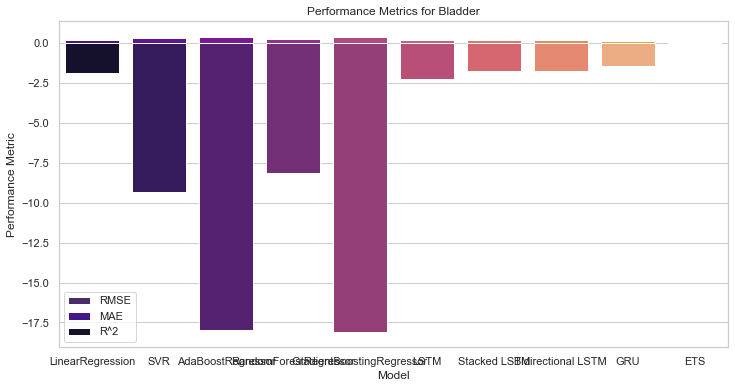

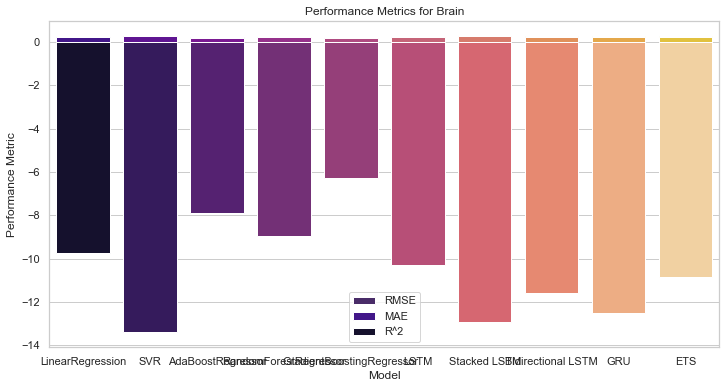

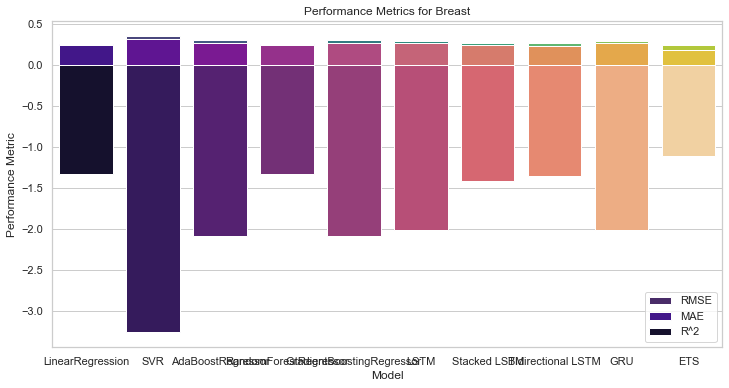

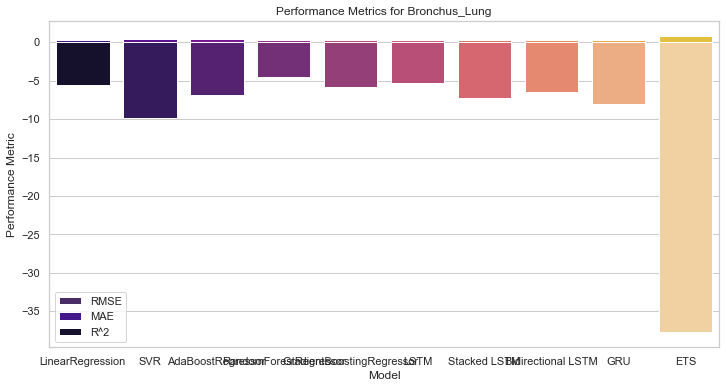

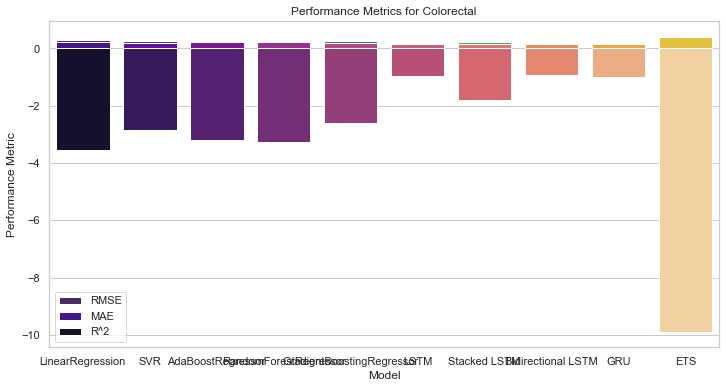

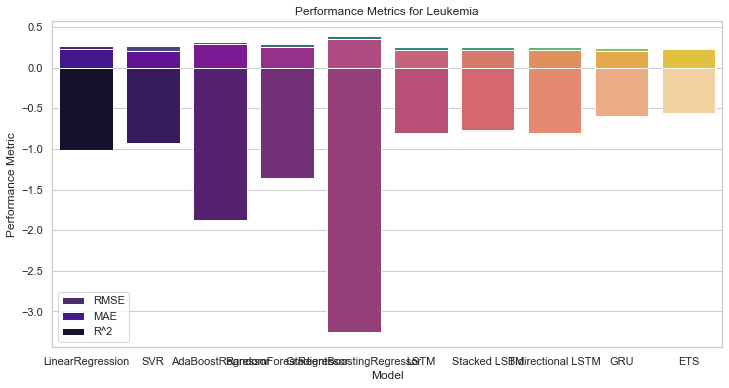

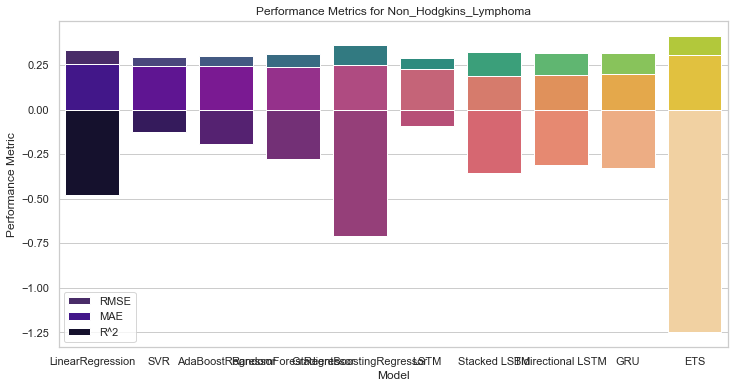

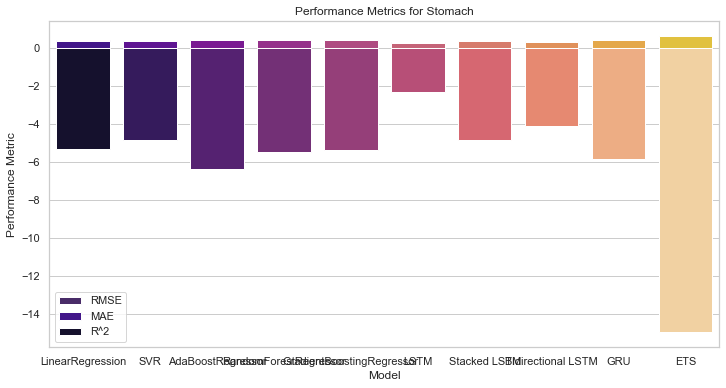

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Iterate over each cancer type
for cancer_type in cancer_columns:
    # Filter results for the current cancer type
    cancer_results = results_df[results_df['Cancer_Type'] == cancer_type]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.title(f"Performance Metrics for {cancer_type}")
    sns.barplot(x='Model', y='RMSE', data=cancer_results, palette='viridis', ci=None, label='RMSE')
    sns.barplot(x='Model', y='MAE', data=cancer_results, palette='plasma', ci=None, label='MAE')
    sns.barplot(x='Model', y='R_Squared', data=cancer_results, palette='magma', ci=None, label='R^2')

    # Add labels and legend
    plt.xlabel("Model")
    plt.ylabel("Performance Metric")
    plt.legend()

    # Save or show the plot
    plt.savefig(f'{cancer_type}_performance_metrics.png')
    plt.show()


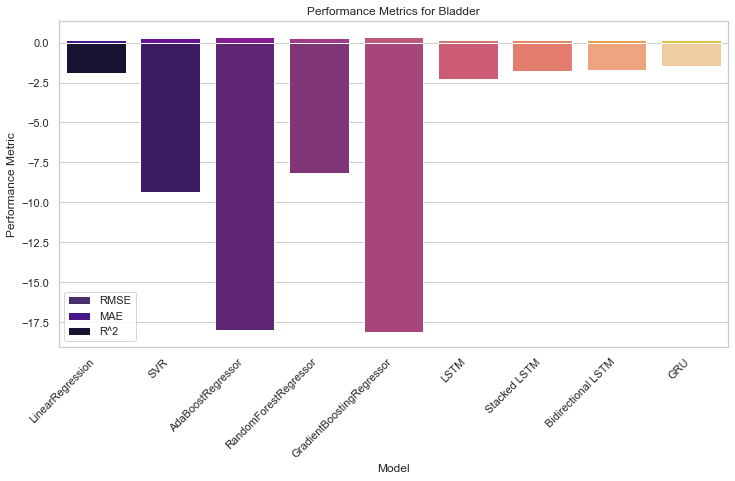

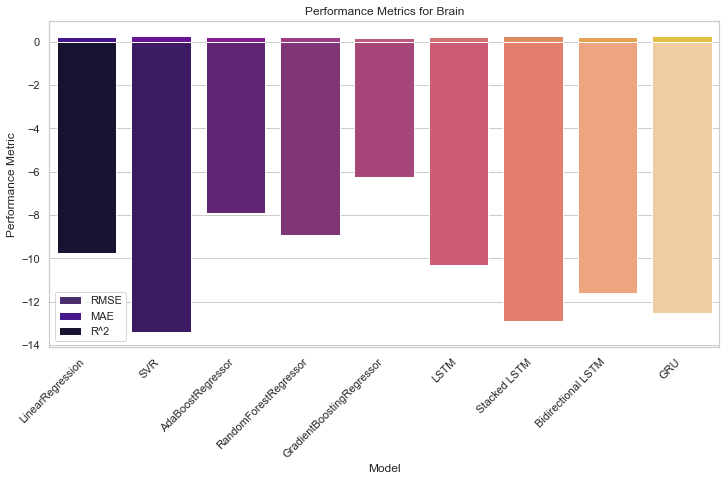

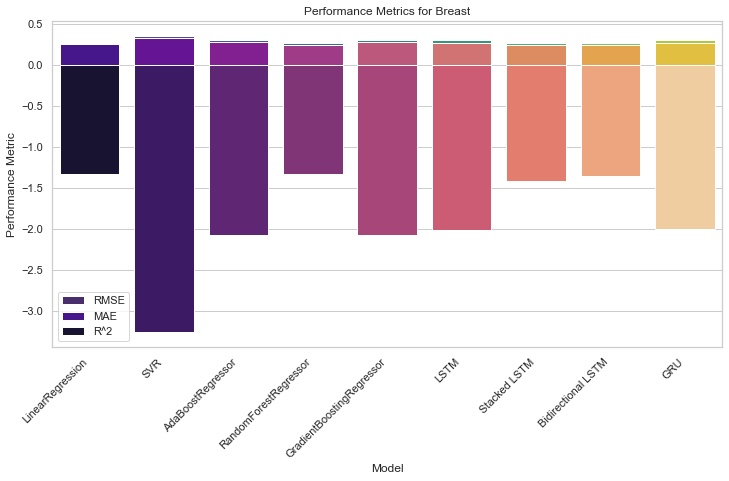

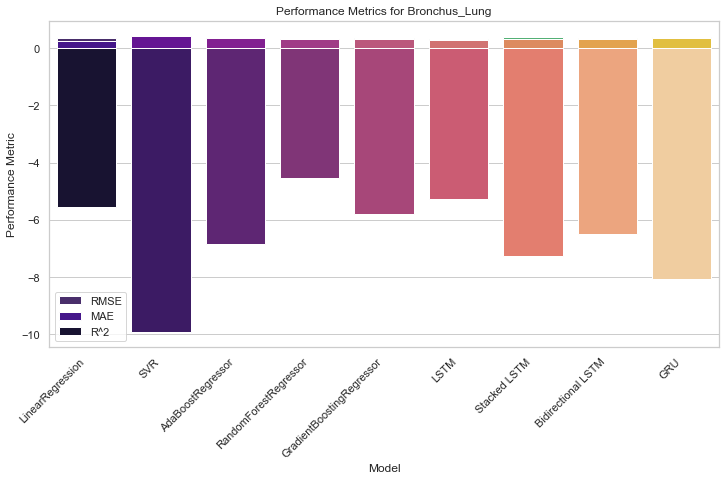

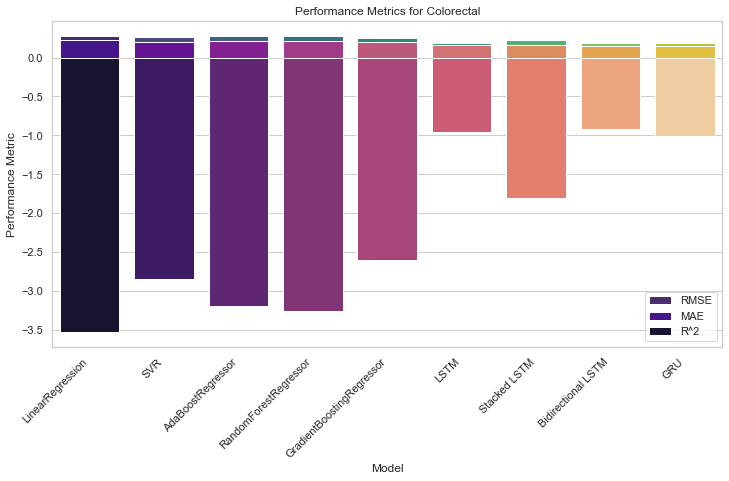

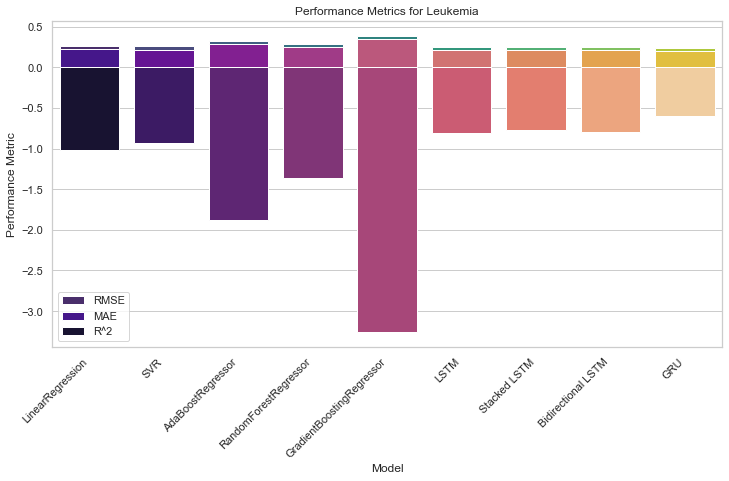

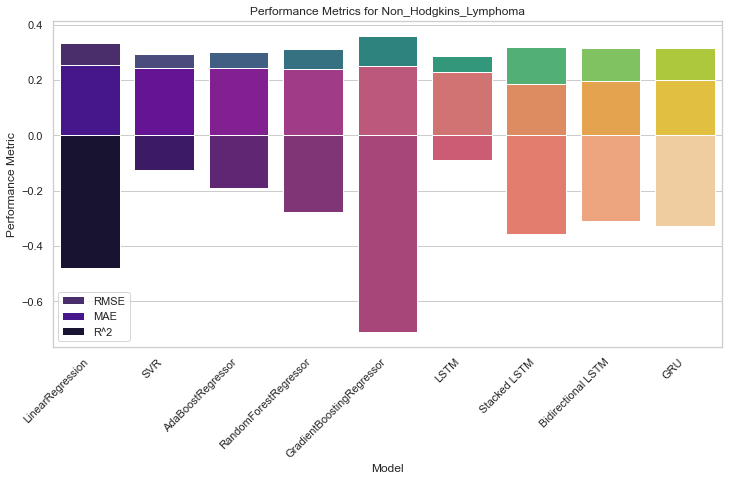

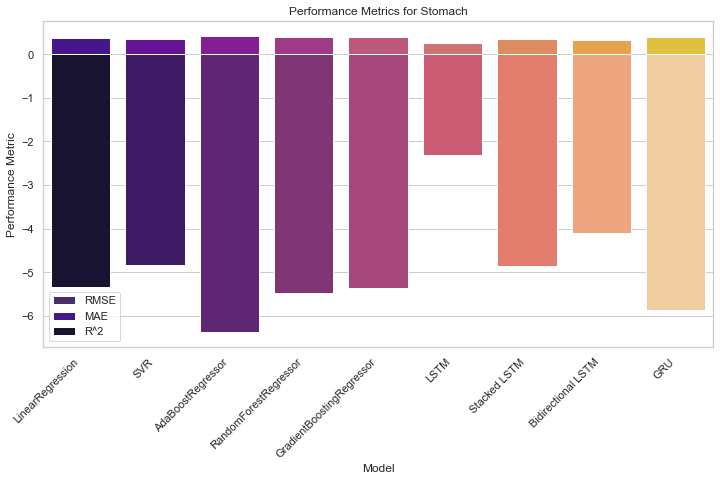

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Iterate over each cancer type
for cancer_type in cancer_columns:
    # Filter results for the current cancer type and exclude ETS
    cancer_results = results_df[(results_df['Cancer_Type'] == cancer_type) & (results_df['Model'] != 'ETS')]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.title(f"Performance Metrics for {cancer_type}")
    sns.barplot(x='Model', y='RMSE', data=cancer_results, palette='viridis', ci=None, label='RMSE')
    sns.barplot(x='Model', y='MAE', data=cancer_results, palette='plasma', ci=None, label='MAE')
    sns.barplot(x='Model', y='R_Squared', data=cancer_results, palette='magma', ci=None, label='R^2')

    # Add labels and legend
    plt.xlabel("Model")
    plt.ylabel("Performance Metric")
    plt.legend()

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')

    # Save or show the plot
    plt.savefig(f'{cancer_type}_performance_metrics.png')
    plt.show()


In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional, GRU
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import time

# Set a random seed for reproducibility
np.random.seed(42)

# Load and preprocess the new dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Define the columns representing cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=['Cancer_Type', 'Model', 'RMSE', 'MAE', 'R_Squared', 'Training_Time'])

for cancer_type in cancer_columns:
    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Normalize the target variable
    scaler = MinMaxScaler(feature_range=(0, 1))
    target_scaled = scaler.fit_transform(target)

    # Split the data into training and testing sets
    train_size = 15  # Number of years for training
    test_size = 5  # Number of years for testing

    train_data = target_scaled[:train_size]
    test_data = target_scaled[train_size:train_size + test_size]

    # Split into input and output variables
    X_train = train_data[:-1]
    y_train = train_data[1:]
    X_test = test_data[:-1]
    y_test = test_data[1:]

    # Define the regression models to be evaluated
    models = [
        LinearRegression(),
        SVR(),
        AdaBoostRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor()
    ]

    print(f"Predicting {cancer_type}:")

    # Train and evaluate each model
    for model in models:
        start_time = time.time()
        model.fit(X_train, y_train.ravel())
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        training_time = time.time() - start_time

        model_name = model.__class__.__name__
        print(f"{model_name} RMSE: {rmse}")
        print(f"{model_name} MAE: {mae}")
        print(f"{model_name} R-squared: {r2}")
        print(f"{model_name} Training Time: {training_time}")
        print()

        # Append results to the DataFrame
        results_df = results_df.append({
            'Cancer_Type': cancer_type,
            'Model': model_name,
            'RMSE': rmse,
            'MAE': mae,
            'R_Squared': r2,
            'Training_Time': training_time
        }, ignore_index=True)

    # Define the deep learning models to be evaluated
    deep_learning_models = [
        (Sequential([LSTM(32, input_shape=(X_train.shape[1], 1)), Dense(1)]), "LSTM"),
        (Sequential([LSTM(32, input_shape=(X_train.shape[1], 1), return_sequences=True), LSTM(32), Dense(1)]), "Stacked LSTM"),
        (Sequential([Bidirectional(LSTM(32), input_shape=(X_train.shape[1], 1)), Dense(1)]), "Bidirectional LSTM"),
        (Sequential([GRU(32, input_shape=(X_train.shape[1], 1)), Dense(1)]), "GRU")
    ]

    # Train and evaluate each deep learning model
    for model, model_name in deep_learning_models:
        start_time = time.time()
        model.compile(loss='mse', optimizer='adam')
        model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=1, verbose=0)
        predictions = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        training_time = time.time() - start_time

        print(f"{model_name} RMSE: {rmse}")
        print(f"{model_name} MAE: {mae}")
        print(f"{model_name} R-squared: {r2}")
        print(f"{model_name} Training Time: {training_time}")
        print()

        # Append results to the DataFrame
        results_df = results_df.append({
            'Cancer_Type': cancer_type,
            'Model': model_name,
            'RMSE': rmse,
            'MAE': mae,
            'R_Squared': r2,
            'Training_Time': training_time
        }, ignore_index=True)

    # Exponential Smoothing
    start_time = time.time()
    ets_model = ExponentialSmoothing(y_train.ravel())
    ets_fit = ets_model.fit()
    ets_predictions = ets_fit.forecast(len(y_test))
    ets_mse = mean_squared_error(y_test, ets_predictions)
    ets_rmse = np.sqrt(ets_mse)
    ets_mae = mean_absolute_error(y_test, ets_predictions)
    ets_r2 = r2_score(y_test, ets_predictions)
    ets_training_time = time.time() - start_time
    print(f"ETS RMSE: {ets_rmse}")
    print(f"ETS MAE: {ets_mae}")
    print(f"ETS R-squared: {ets_r2}")
    print(f"ETS Training Time: {ets_training_time}")
    print()

    # Append results to the DataFrame
    results_df = results_df.append({
        'Cancer_Type': cancer_type,
        'Model': 'ETS',
        'RMSE': ets_rmse,
        'MAE': ets_mae,
        'R_Squared': ets_r2,
        'Training_Time': ets_training_time
    }, ignore_index=True)

# Save the results DataFrame to a CSV file
results_df.to_csv('cancer_prediction_results.csv', index=False)


Predicting Bladder:
LinearRegression RMSE: 0.16947225912860753
LinearRegression MAE: 0.15966585122919902
LinearRegression R-squared: -1.8732813633576475
LinearRegression Training Time: 0.0028285980224609375

SVR RMSE: 0.3216301118166203
SVR MAE: 0.28612671502200715
SVR R-squared: -9.348903129751639
SVR Training Time: 0.003075122833251953

AdaBoostRegressor RMSE: 0.43547046659940075
AdaBoostRegressor MAE: 0.3698979591836734
AdaBoostRegressor R-squared: -17.971354166666668
AdaBoostRegressor Training Time: 0.08882021903991699



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


RandomForestRegressor RMSE: 0.3024082380929263
RandomForestRegressor MAE: 0.2595615889212828
RandomForestRegressor R-squared: -8.14888469424957
RandomForestRegressor Training Time: 0.152846097946167

GradientBoostingRegressor RMSE: 0.4371912272933369
GradientBoostingRegressor MAE: 0.374490586481636
GradientBoostingRegressor R-squared: -18.121580929276355
GradientBoostingRegressor Training Time: 0.05473971366882324



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 482ms/step
LSTM RMSE: 0.2037768521224325
LSTM MAE: 0.17948526068001375
LSTM R-squared: -3.1542307546536454
LSTM Training Time: 2.903721809387207



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 915ms/step
Stacked LSTM RMSE: 0.15720541045503708
Stacked LSTM MAE: 0.14942971540957078
Stacked LSTM R-squared: -1.4723838385118495
Stacked LSTM Training Time: 5.2119739055633545



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 950ms/step
Bidirectional LSTM RMSE: 0.1661017081837808
Bidirectional LSTM MAE: 0.15682015491991624
Bidirectional LSTM R-squared: -1.7601273202178875
Bidirectional LSTM Training Time: 4.907746315002441



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 433ms/step
GRU RMSE: 0.16075338123660565
GRU MAE: 0.15260382665663347
GRU R-squared: -1.585241693299274
GRU Training Time: 3.4968209266662598

ETS RMSE: 0.10116531082811123
ETS MAE: 0.08163265306122447
ETS R-squared: -0.023868445666292315
ETS Training Time: 0.010623931884765625

Predicting Brain:
LinearRegression RMSE: 0.2404257473581802
LinearRegression MAE: 0.20894651375215667
LinearRegression R-squared: -9.76749718874789
LinearRegression Training Time: 0.0

SVR RMSE: 0.27816664837534316
SVR MAE: 0.2694038474305689
SVR R-squared: -13.413283635489085
SVR Training Time: 0.0

AdaBoostRegressor RMSE: 0.21866377522535782
AdaBoostRegressor MAE: 0.20169491525423733
AdaBoostRegressor R-squared: -7.906488294314384
AdaBoostRegressor Training Time: 0.03237557411193848



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is dep

RandomForestRegressor RMSE: 0.23108849819058122
RandomForestRegressor MAE: 0.21816101694915274
RandomForestRegressor R-squared: -8.947397618729115
RandomForestRegressor Training Time: 0.14434099197387695

GradientBoostingRegressor RMSE: 0.19742165658100153
GradientBoostingRegressor MAE: 0.1749461246541332
GradientBoostingRegressor R-squared: -6.2600966317537186
GradientBoostingRegressor Training Time: 0.04578590393066406



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 450ms/step
LSTM RMSE: 0.2364469087201719
LSTM MAE: 0.2153302373017295
LSTM R-squared: -9.414060552744637
LSTM Training Time: 2.7749416828155518



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 832ms/step
Stacked LSTM RMSE: 0.27743148609120377
Stacked LSTM MAE: 0.25892043277873833
Stacked LSTM R-squared: -13.337199026177265
Stacked LSTM Training Time: 4.9246392250061035



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 871ms/step
Bidirectional LSTM RMSE: 0.25950533339363613
Bidirectional LSTM MAE: 0.2390503825272544
Bidirectional LSTM R-squared: -11.544270012894327
Bidirectional LSTM Training Time: 4.664311408996582



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 469ms/step
GRU RMSE: 0.27436030499269143
GRU MAE: 0.2553125934328063
GRU R-squared: -13.02152890342375
GRU Training Time: 2.687335252761841

ETS RMSE: 0.2524128008966311
ETS MAE: 0.24154459928554528
ETS R-squared: -10.867946219591436
ETS Training Time: 0.007063627243041992

Predicting Breast:
LinearRegression RMSE: 0.2651490562378072
LinearRegression MAE: 0.252609152680519
LinearRegression R-squared: -1.3310711451490493
LinearRegression Training Time: 0.0009949207305908203

SVR RMSE: 0.35853762848073223
SVR MAE: 0.3238441330104861
SVR R-squared: -3.262308109471257
SVR Training Time: 0.0019941329956054688

AdaBoostRegressor RMSE: 0.30485863946277986
AdaBoostRegressor MAE: 0.274869109947644
AdaBoostRegressor R-squared: -2.0815723699159285
AdaBoostRegressor Training Time: 0.08685493469238281



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is dep

RandomForestRegressor RMSE: 0.2649577802956871
RandomForestRegressor MAE: 0.24354712041884805
RandomForestRegressor R-squared: -1.3277091342876588
RandomForestRegressor Training Time: 0.12174153327941895

GradientBoostingRegressor RMSE: 0.3047163816201429
GradientBoostingRegressor MAE: 0.2747989842562621
GradientBoostingRegressor R-squared: -2.078697099221743
GradientBoostingRegressor Training Time: 0.05286741256713867



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 433ms/step
LSTM RMSE: 0.3042305440364956
LSTM MAE: 0.26850941371543247
LSTM R-squared: -2.0688876209938782
LSTM Training Time: 2.733158826828003



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 983ms/step
Stacked LSTM RMSE: 0.27529452710155644
Stacked LSTM MAE: 0.24870573323590597
Stacked LSTM R-squared: -1.5128728410308114
Stacked LSTM Training Time: 5.114454746246338



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 972ms/step
Bidirectional LSTM RMSE: 0.2873336766107541
Bidirectional LSTM MAE: 0.25727822970969516
Bidirectional LSTM R-squared: -1.7374640039920655
Bidirectional LSTM Training Time: 4.712028741836548



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 429ms/step
GRU RMSE: 0.26849018376771655
GRU MAE: 0.24177661877496084
GRU R-squared: -1.390188659722242
GRU Training Time: 2.6794047355651855

ETS RMSE: 0.2518251933613194
ETS MAE: 0.1823633540791643
ETS R-squared: -1.1026825446819242
ETS Training Time: 0.007534027099609375

Predicting Bronchus_Lung:
LinearRegression RMSE: 0.33924269513228533
LinearRegression MAE: 0.2542086809522913
LinearRegression R-squared: -5.537480341490064
LinearRegression Training Time: 0.0

SVR RMSE: 0.43839103731827705
SVR MAE: 0.43292490391720817
SVR R-squared: -9.917236525844439
SVR Training Time: 0.0

AdaBoostRegressor RMSE: 0.37116714875250545
AdaBoostRegressor MAE: 0.36707427536231885
AdaBoostRegressor R-squared: -6.825794649515287
AdaBoostRegressor Training Time: 0.07799053192138672



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is dep

RandomForestRegressor RMSE: 0.31244830927248424
RandomForestRegressor MAE: 0.3108369565217394
RandomForestRegressor R-squared: -4.545564286353477
RandomForestRegressor Training Time: 0.16233062744140625

GradientBoostingRegressor RMSE: 0.3461121245363705
GradientBoostingRegressor MAE: 0.3371097914651529
GradientBoostingRegressor R-squared: -5.804919823390212
GradientBoostingRegressor Training Time: 0.05707502365112305



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 1s/step
LSTM RMSE: 0.3038576012238546
LSTM MAE: 0.2374162434235863
LSTM R-squared: -4.244808024008745
LSTM Training Time: 3.8829598426818848



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 910ms/step
Stacked LSTM RMSE: 0.3932981387148384
Stacked LSTM MAE: 0.33652146743691486
Stacked LSTM R-squared: -7.786849107098872
Stacked LSTM Training Time: 4.932622194290161



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 860ms/step
Bidirectional LSTM RMSE: 0.3661672670897609
Bidirectional LSTM MAE: 0.29910281138575595
Bidirectional LSTM R-squared: -6.616376837706703
Bidirectional LSTM Training Time: 4.664900064468384



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 452ms/step
GRU RMSE: 0.4038618863025852
GRU MAE: 0.34849455045617145
GRU R-squared: -8.265206966654464
GRU Training Time: 2.5992512702941895

ETS RMSE: 0.8259439190677996
ETS MAE: 0.8152173867692116
ETS R-squared: -37.75167743231625
ETS Training Time: 0.00681304931640625

Predicting Colorectal:
LinearRegression RMSE: 0.28273644907947076
LinearRegression MAE: 0.2262212354781054
LinearRegression R-squared: -3.532025806252685
LinearRegression Training Time: 0.001634836196899414

SVR RMSE: 0.2605694967624956
SVR MAE: 0.20409394467285058
SVR R-squared: -2.8492482758270357
SVR Training Time: 0.0

AdaBoostRegressor RMSE: 0.2722029471634068
AdaBoostRegressor MAE: 0.21833333333333332
AdaBoostRegressor R-squared: -3.200629921259843
AdaBoostRegressor Training Time: 0.028230905532836914



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is dep

RandomForestRegressor RMSE: 0.27411262349405985
RandomForestRegressor MAE: 0.2166763888888886
RandomForestRegressor R-squared: -3.2597768392388415
RandomForestRegressor Training Time: 0.17082953453063965

GradientBoostingRegressor RMSE: 0.2520682015103552
GradientBoostingRegressor MAE: 0.2020693193996579
GradientBoostingRegressor R-squared: -2.6021757726865222
GradientBoostingRegressor Training Time: 0.05755019187927246



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 459ms/step
LSTM RMSE: 0.1931528708817734
LSTM MAE: 0.1610538949569066
LSTM R-squared: -1.1151010001186727
LSTM Training Time: 2.6954736709594727



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 939ms/step
Stacked LSTM RMSE: 0.202268633792351
Stacked LSTM MAE: 0.16284535725911456
Stacked LSTM R-squared: -1.3194545004473563
Stacked LSTM Training Time: 5.799858570098877



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 916ms/step
Bidirectional LSTM RMSE: 0.2185269056647443
Bidirectional LSTM MAE: 0.1766832982500394
Bidirectional LSTM R-squared: -1.707313867682977
Bidirectional LSTM Training Time: 5.091876029968262



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 440ms/step
GRU RMSE: 0.21215468964268833
GRU MAE: 0.16911112417777377
GRU R-squared: -1.5517260537730313
GRU Training Time: 2.7972724437713623

ETS RMSE: 0.4388138748599983
ETS MAE: 0.4182328632242538
ETS R-squared: -9.916652289302782
ETS Training Time: 0.0009970664978027344

Predicting Leukemia:
LinearRegression RMSE: 0.26973708557810083
LinearRegression MAE: 0.2302888222055514
LinearRegression R-squared: -1.0173153630976426
LinearRegression Training Time: 0.009480953216552734

SVR RMSE: 0.2639474593275122
SVR MAE: 0.20935522505419185
SVR R-squared: -0.9316455875058236
SVR Training Time: 0.0033359527587890625

AdaBoostRegressor RMSE: 0.3219271674397007
AdaBoostRegressor MAE: 0.29069767441860467
AdaBoostRegressor R-squared: -1.8734770384254915
AdaBoostRegressor Training Time: 0.0431520938873291



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is dep

RandomForestRegressor RMSE: 0.2915866407508398
RandomForestRegressor MAE: 0.25546511627907
RandomForestRegressor R-squared: -1.357369821930651
RandomForestRegressor Training Time: 0.1645352840423584

GradientBoostingRegressor RMSE: 0.39192102067296264
GradientBoostingRegressor MAE: 0.3519409762922208
GradientBoostingRegressor R-squared: -3.258822985378485
GradientBoostingRegressor Training Time: 0.05388307571411133



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 520ms/step
LSTM RMSE: 0.24334089910146214
LSTM MAE: 0.19368473960216653
LSTM R-squared: -0.6418092233404196
LSTM Training Time: 3.031146287918091



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 2s 2s/step
Stacked LSTM RMSE: 0.25352848484574586
Stacked LSTM MAE: 0.21683950964794602
Stacked LSTM R-squared: -0.7821571459344561
Stacked LSTM Training Time: 5.901522159576416



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 875ms/step
Bidirectional LSTM RMSE: 0.263396239801819
Bidirectional LSTM MAE: 0.22590888066347253
Bidirectional LSTM R-squared: -0.9235860368595654
Bidirectional LSTM Training Time: 4.952120065689087



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 458ms/step
GRU RMSE: 0.24031650184009803
GRU MAE: 0.20984478537426438
GRU R-squared: -0.6012519127837708
GRU Training Time: 2.6531877517700195

ETS RMSE: 0.23720893176423657
ETS MAE: 0.22513537875936812
ETS R-squared: -0.5601075905355903
ETS Training Time: 0.008532285690307617

Predicting Non_Hodgkins_Lymphoma:
LinearRegression RMSE: 0.33509101971866667
LinearRegression MAE: 0.25444468116024127
LinearRegression R-squared: -0.47862875460592047
LinearRegression Training Time: 0.0

SVR RMSE: 0.2925207962984085
SVR MAE: 0.24286486028258003
SVR R-squared: -0.12680058387297333
SVR Training Time: 0.009722471237182617

AdaBoostRegressor RMSE: 0.3007191810226089
AdaBoostRegressor MAE: 0.24365942028985504
AdaBoostRegressor R-squared: -0.19084662258524587
AdaBoostRegressor Training Time: 0.07940030097961426



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is dep

RandomForestRegressor RMSE: 0.3116303259731999
RandomForestRegressor MAE: 0.24086594202898576
RandomForestRegressor R-squared: -0.2788305344224069
RandomForestRegressor Training Time: 0.10730838775634766

GradientBoostingRegressor RMSE: 0.3604797112630523
GradientBoostingRegressor MAE: 0.2501660481359147
GradientBoostingRegressor R-squared: -0.7111781354712294
GradientBoostingRegressor Training Time: 0.0481569766998291



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 443ms/step
LSTM RMSE: 0.291881381235735
LSTM MAE: 0.2278407893103102
LSTM R-squared: -0.12187986835791387
LSTM Training Time: 2.787402391433716



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 933ms/step
Stacked LSTM RMSE: 0.3091332878449755
Stacked LSTM MAE: 0.2044909900945166
Stacked LSTM R-squared: -0.25841856091814797
Stacked LSTM Training Time: 5.071458578109741



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 810ms/step
Bidirectional LSTM RMSE: 0.3178758840440079
Bidirectional LSTM MAE: 0.2067168659490088
Bidirectional LSTM R-squared: -0.3306037141762941
Bidirectional LSTM Training Time: 5.233554840087891



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 403ms/step
GRU RMSE: 0.32078319514517223
GRU MAE: 0.18795904581961426
GRU R-squared: -0.35505457572273236
GRU Training Time: 2.522212028503418

ETS RMSE: 0.4133550982520428
ETS MAE: 0.30809603217054865
ETS R-squared: -1.2499878162459606
ETS Training Time: 0.00701451301574707

Predicting Stomach:
LinearRegression RMSE: 0.3932098453488233
LinearRegression MAE: 0.37064697417886994
LinearRegression R-squared: -5.342944354392462
LinearRegression Training Time: 0.0029926300048828125

SVR RMSE: 0.37742641020253576
SVR MAE: 0.34597288668924986
SVR R-squared: -4.843952907051292
SVR Training Time: 0.0023343563079833984

AdaBoostRegressor RMSE: 0.4239163206363213
AdaBoostRegressor MAE: 0.403735632183908
AdaBoostRegressor R-squared: -6.372289972899725
AdaBoostRegressor Training Time: 0.09255647659301758



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is dep

RandomForestRegressor RMSE: 0.3975791213069018
RandomForestRegressor MAE: 0.38295689655172477
RandomForestRegressor R-squared: -5.484690810975629
RandomForestRegressor Training Time: 0.1288919448852539

GradientBoostingRegressor RMSE: 0.39399948362133735
GradientBoostingRegressor MAE: 0.3839873062495382
GradientBoostingRegressor R-squared: -5.368445550826998
GradientBoostingRegressor Training Time: 0.05708169937133789



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 456ms/step
LSTM RMSE: 0.3072375270889587
LSTM MAE: 0.2789039568140589
LSTM R-squared: -2.8724931347079106
LSTM Training Time: 2.6951375007629395



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 882ms/step
Stacked LSTM RMSE: 0.3558677533880576
Stacked LSTM MAE: 0.33157952438140736
Stacked LSTM R-squared: -4.195404999762472
Stacked LSTM Training Time: 4.979486465454102



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 1s 682ms/step
Bidirectional LSTM RMSE: 0.34716989364847206
Bidirectional LSTM MAE: 0.3223834217622362
Bidirectional LSTM R-squared: -3.9445440186343736
Bidirectional LSTM Training Time: 5.2004077434539795



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 323ms/step
GRU RMSE: 0.4029698175690537
GRU MAE: 0.3806089938714586
GRU R-squared: -5.66173223053884
GRU Training Time: 2.7019290924072266

ETS RMSE: 0.6237572850089287
ETS MAE: 0.6039018193703414
ETS R-squared: -14.961488763709166
ETS Training Time: 0.008129358291625977



C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3946211359.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


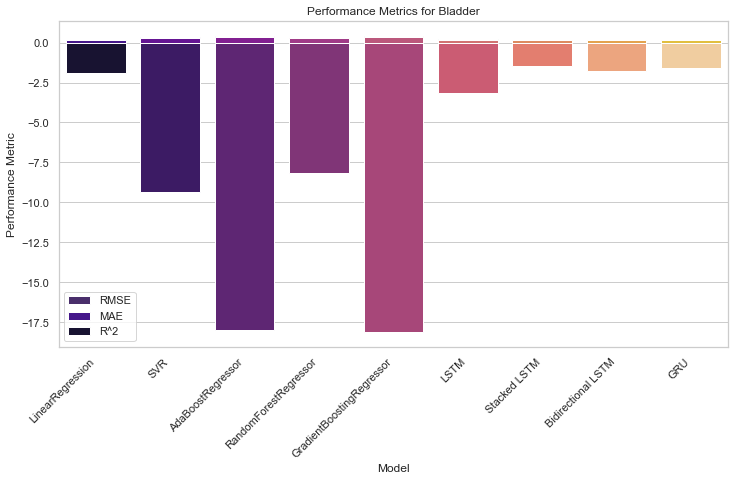

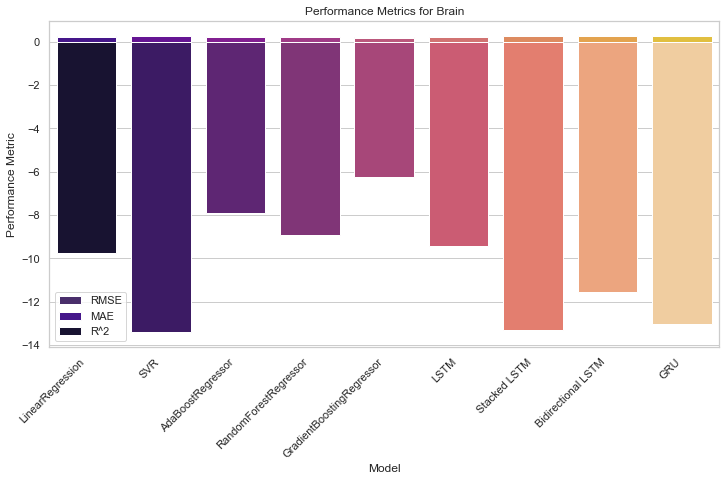

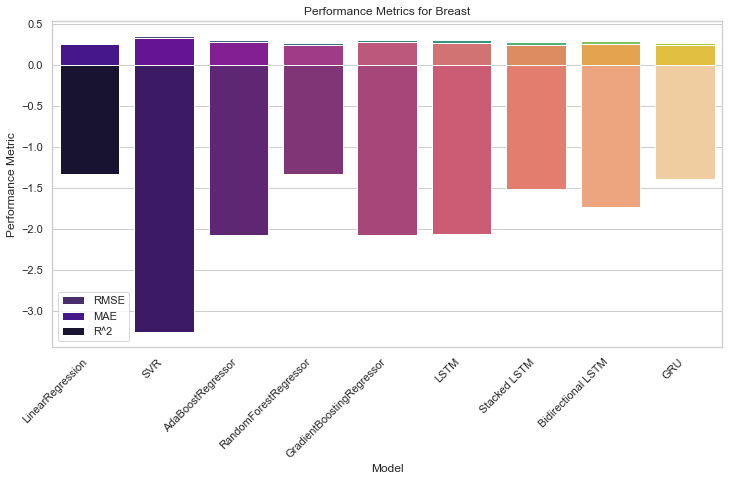

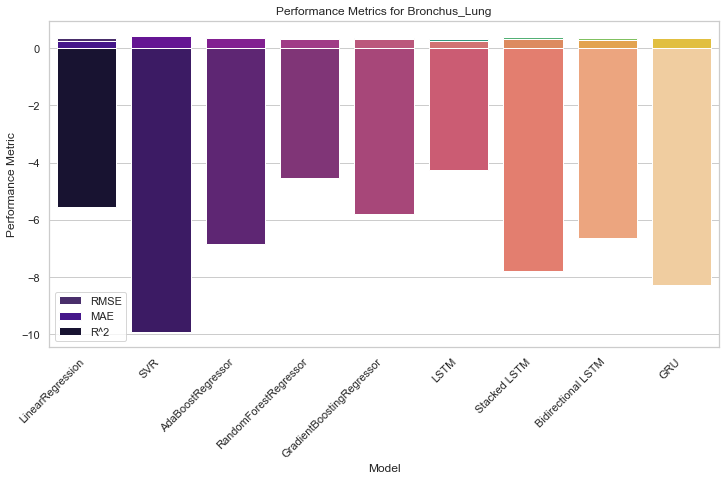

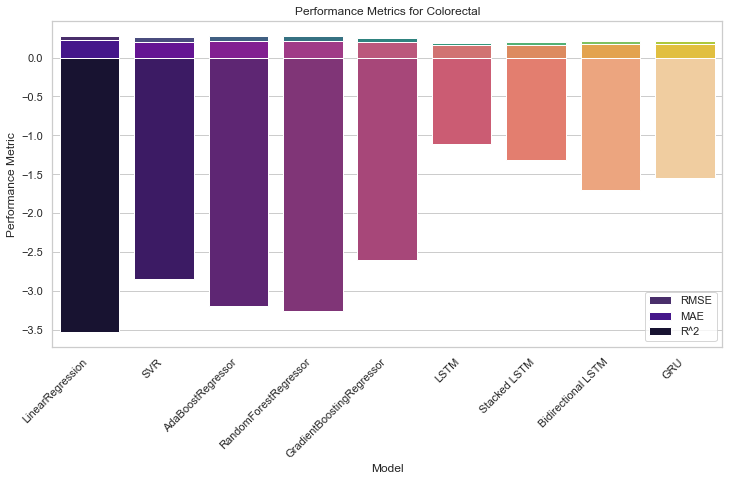

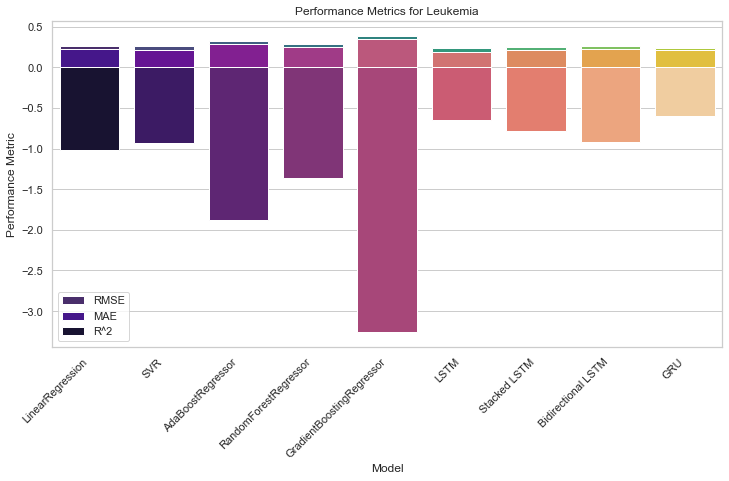

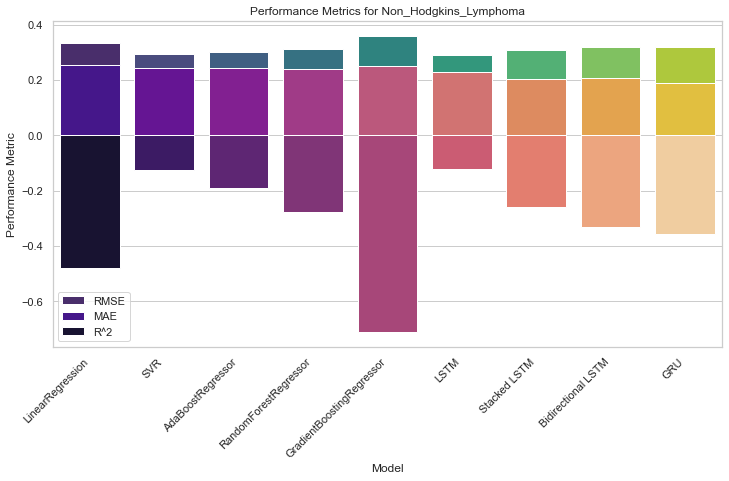

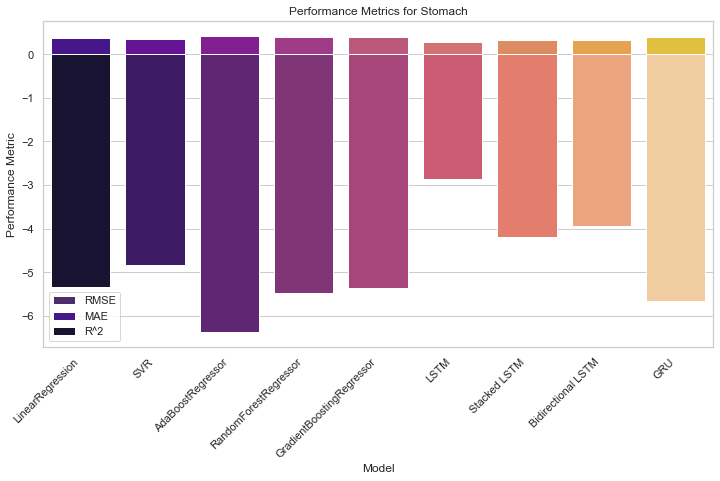

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Iterate over each cancer type
for cancer_type in cancer_columns:
    # Filter results for the current cancer type and exclude ETS
    cancer_results = results_df[(results_df['Cancer_Type'] == cancer_type) & (results_df['Model'] != 'ETS')]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.title(f"Performance Metrics for {cancer_type}")
    sns.barplot(x='Model', y='RMSE', data=cancer_results, palette='viridis', ci=None, label='RMSE')
    sns.barplot(x='Model', y='MAE', data=cancer_results, palette='plasma', ci=None, label='MAE')
    sns.barplot(x='Model', y='R_Squared', data=cancer_results, palette='magma', ci=None, label='R^2')

    # Add labels and legend
    plt.xlabel("Model")
    plt.ylabel("Performance Metric")
    plt.legend()

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')

    # Save or show the plot
    plt.savefig(f'{cancer_type}_performance_metrics.png')
    plt.show()


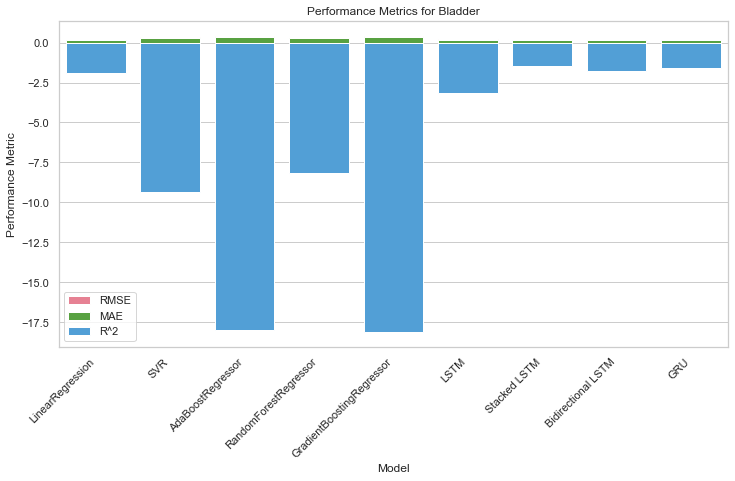

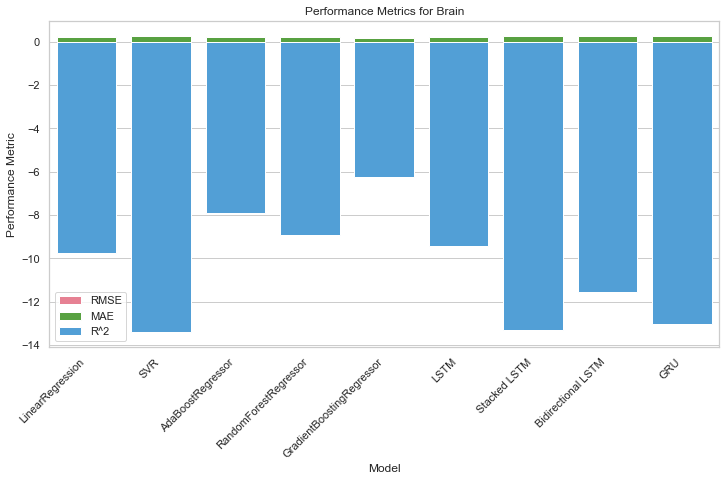

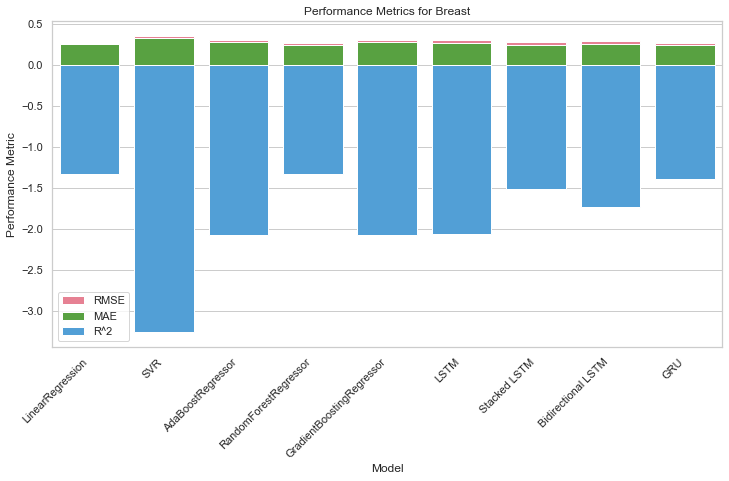

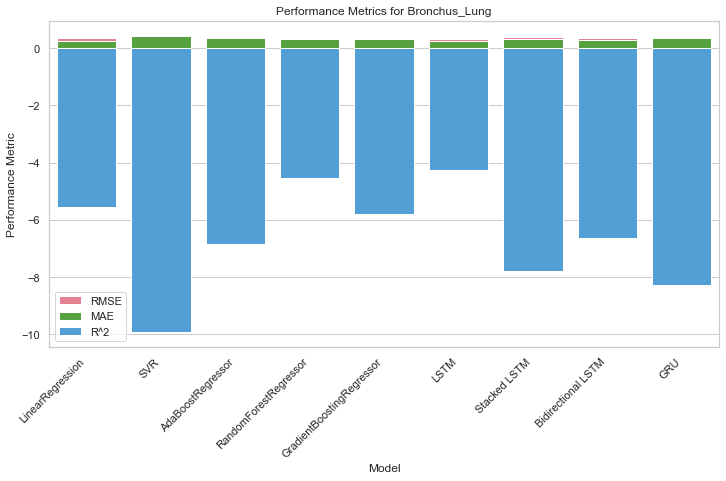

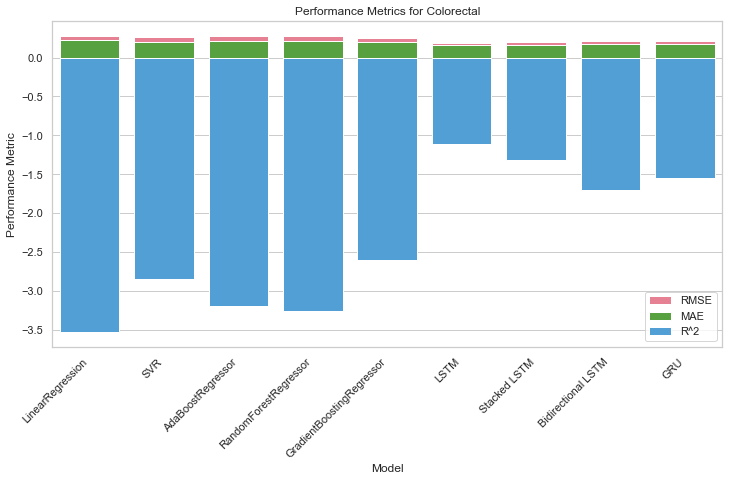

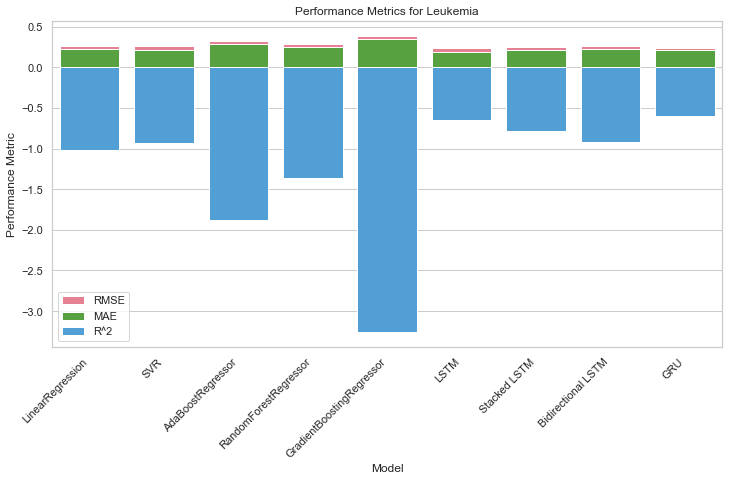

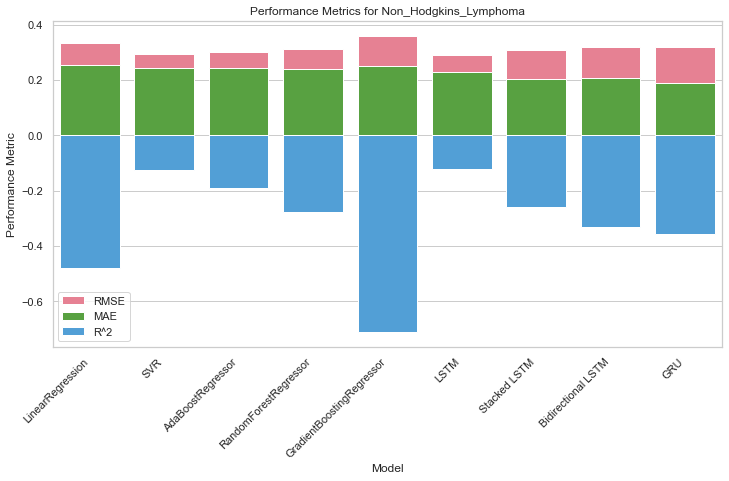

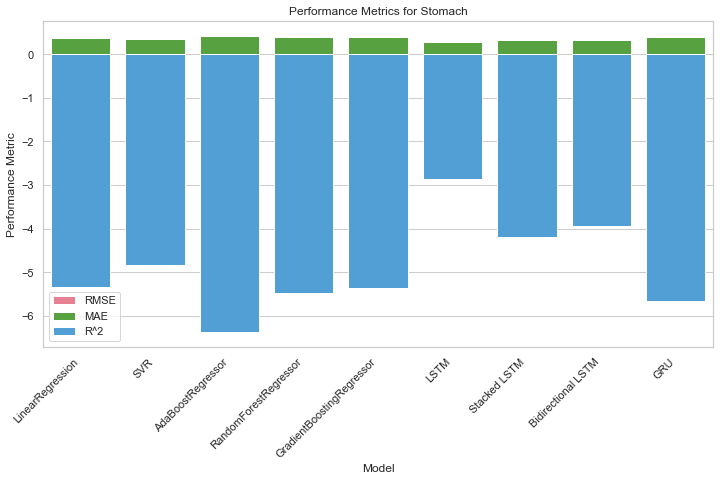

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Iterate over each cancer type
for cancer_type in cancer_columns:
    # Filter results for the current cancer type and exclude ETS
    cancer_results = results_df[(results_df['Cancer_Type'] == cancer_type) & (results_df['Model'] != 'ETS')]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.title(f"Performance Metrics for {cancer_type}")

    # Use different colors for each metric
    colors = sns.color_palette("husl", 3)

    sns.barplot(x='Model', y='RMSE', data=cancer_results, color=colors[0], ci=None, label='RMSE')
    sns.barplot(x='Model', y='MAE', data=cancer_results, color=colors[1], ci=None, label='MAE')
    sns.barplot(x='Model', y='R_Squared', data=cancer_results, color=colors[2], ci=None, label='R^2')

    # Add labels and legend
    plt.xlabel("Model")
    plt.ylabel("Performance Metric")
    plt.legend()

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')

    # Save or show the plot
    plt.savefig(f'{cancer_type}_performance_metrics.png')
    plt.show()


1/1 [==============================] - 0s 294ms/step

Evaluation for Cancer Type: Bladder
True Values (Original Scale): [13]
Forecasted Values (Original Scale): [-1.114496]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3996698711.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 300ms/step

Evaluation for Cancer Type: Brain
True Values (Original Scale): [9]
Forecasted Values (Original Scale): [-1.4337032]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3996698711.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 283ms/step

Evaluation for Cancer Type: Breast
True Values (Original Scale): [133]
Forecasted Values (Original Scale): [0.5244217]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3996698711.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 292ms/step

Evaluation for Cancer Type: Bronchus_Lung
True Values (Original Scale): [39]
Forecasted Values (Original Scale): [-0.6634374]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3996698711.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 254ms/step

Evaluation for Cancer Type: Colorectal
True Values (Original Scale): [21]
Forecasted Values (Original Scale): [-0.7781753]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3996698711.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 319ms/step

Evaluation for Cancer Type: Leukemia
True Values (Original Scale): [46]
Forecasted Values (Original Scale): [0.19753867]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3996698711.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 300ms/step

Evaluation for Cancer Type: Non_Hodgkins_Lymphoma
True Values (Original Scale): [30]
Forecasted Values (Original Scale): [0.27182674]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3996698711.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 308ms/step

Evaluation for Cancer Type: Stomach
True Values (Original Scale): [12]
Forecasted Values (Original Scale): [-1.3165087]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3996698711.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


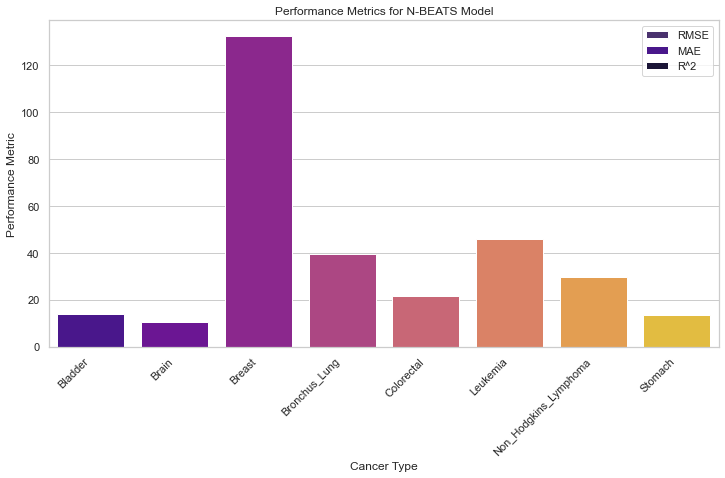

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=['Cancer_Type', 'Model', 'RMSE', 'MAE', 'R_Squared'])

# Initialize lists to store evaluation metrics
eval_metrics = []

# Perform the same model evaluation for each cancer type with missing data
for cancer_type in cancer_columns:
    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Handle missing values by imputing with the mean of the available values
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Train and evaluate N-BEATS model
    forecast = train_and_predict_nbeats(target_scaled)

    # Evaluate N-BEATS model
    print(f"\nEvaluation for Cancer Type: {cancer_type}")
    print("True Values (Original Scale):", target[-1])
    print("Forecasted Values (Original Scale):", forecast)

    # Calculate and store metrics
    mse = mean_squared_error(target[-1], forecast)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(target[-1], forecast)
    
    # Handle R-squared being 'nan'
    r2 = r2_score(target[-1], forecast)
    r2 = 0.0 if np.isnan(r2) else r2

    model_name = "N-BEATS"
    eval_metrics.append((cancer_type, model_name, rmse, mae, r2))
    
    # Append results to DataFrame
    results_df = results_df.append({
        'Cancer_Type': cancer_type,
        'Model': model_name,
        'RMSE': rmse,
        'MAE': mae,
        'R_Squared': r2
    }, ignore_index=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.title("Performance Metrics for N-BEATS Model")
sns.barplot(x='Cancer_Type', y='RMSE', data=results_df, palette='viridis', ci=None, label='RMSE')
sns.barplot(x='Cancer_Type', y='MAE', data=results_df, palette='plasma', ci=None, label='MAE')
sns.barplot(x='Cancer_Type', y='R_Squared', data=results_df, palette='magma', ci=None, label='R^2')

# Add labels and legend
plt.xlabel("Cancer Type")
plt.ylabel("Performance Metric")
plt.legend()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Save or show the plot
plt.savefig('N_BEATS_performance_metrics.png')
plt.show()


1/1 [==============================] - 0s 287ms/step

Evaluation for Cancer Type: Bladder
True Values (Original Scale): [13]
Forecasted Values (Original Scale): [-0.9293862]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3305774957.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3305774957.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3305774957.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 283ms/step

Evaluation for Cancer Type: Brain
True Values (Original Scale): [9]
Forecasted Values (Original Scale): [-1.2843066]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3305774957.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3305774957.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3305774957.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 304ms/step

Evaluation for Cancer Type: Breast
True Values (Original Scale): [133]
Forecasted Values (Original Scale): [0.3916338]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3305774957.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3305774957.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3305774957.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 274ms/step

Evaluation for Cancer Type: Bronchus_Lung
True Values (Original Scale): [39]
Forecasted Values (Original Scale): [-0.2904552]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3305774957.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3305774957.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3305774957.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 287ms/step

Evaluation for Cancer Type: Colorectal
True Values (Original Scale): [21]
Forecasted Values (Original Scale): [-0.53924847]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3305774957.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3305774957.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3305774957.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 412ms/step

Evaluation for Cancer Type: Leukemia
True Values (Original Scale): [46]
Forecasted Values (Original Scale): [0.34356973]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3305774957.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3305774957.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3305774957.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 323ms/step

Evaluation for Cancer Type: Non_Hodgkins_Lymphoma
True Values (Original Scale): [30]
Forecasted Values (Original Scale): [0.3038705]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3305774957.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3305774957.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3305774957.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 336ms/step

Evaluation for Cancer Type: Stomach
True Values (Original Scale): [12]
Forecasted Values (Original Scale): [-1.3257986]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3305774957.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3305774957.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/3305774957.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


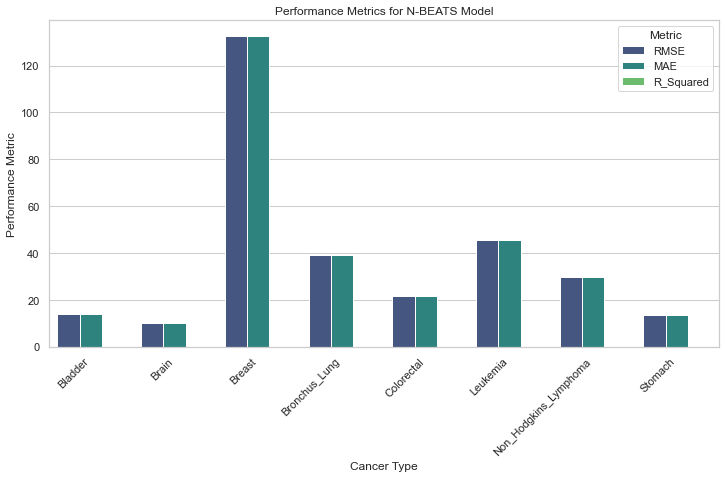

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=['Cancer_Type', 'Model', 'Metric', 'Value'])

# Initialize lists to store evaluation metrics
eval_metrics = []

# Perform the same model evaluation for each cancer type with missing data
for cancer_type in cancer_columns:
    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Handle missing values by imputing with the mean of the available values
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Train and evaluate N-BEATS model
    forecast = train_and_predict_nbeats(target_scaled)

    # Evaluate N-BEATS model
    print(f"\nEvaluation for Cancer Type: {cancer_type}")
    print("True Values (Original Scale):", target[-1])
    print("Forecasted Values (Original Scale):", forecast)

    # Calculate and store metrics
    mse = mean_squared_error(target[-1], forecast)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(target[-1], forecast)
    
    # Handle R-squared being 'nan'
    r2 = r2_score(target[-1], forecast)
    r2 = 0.0 if np.isnan(r2) else r2

    model_name = "N-BEATS"
    eval_metrics.append((cancer_type, model_name, rmse, mae, r2))
    
    # Append results to DataFrame
    results_df = results_df.append({
        'Cancer_Type': cancer_type,
        'Model': model_name,
        'Metric': 'RMSE',
        'Value': rmse
    }, ignore_index=True)
    results_df = results_df.append({
        'Cancer_Type': cancer_type,
        'Model': model_name,
        'Metric': 'MAE',
        'Value': mae
    }, ignore_index=True)
    results_df = results_df.append({
        'Cancer_Type': cancer_type,
        'Model': model_name,
        'Metric': 'R_Squared',
        'Value': r2
    }, ignore_index=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.title("Performance Metrics for N-BEATS Model")
sns.barplot(x='Cancer_Type', y='Value', hue='Metric', data=results_df, palette='viridis')

# Add labels and legend
plt.xlabel("Cancer Type")
plt.ylabel("Performance Metric")
plt.legend(title="Metric")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Save or show the plot
plt.savefig('N_BEATS_performance_metrics.png')
plt.show()


1/1 [==============================] - 0s 290ms/step

Evaluation for Cancer Type: Bladder
True Values (Original Scale): [13]
Forecasted Values (Original Scale): [-0.19003066]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 278ms/step

Evaluation for Cancer Type: Brain
True Values (Original Scale): [9]
Forecasted Values (Original Scale): [-0.5347526]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 322ms/step

Evaluation for Cancer Type: Breast
True Values (Original Scale): [133]
Forecasted Values (Original Scale): [0.47876775]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 314ms/step

Evaluation for Cancer Type: Bronchus_Lung
True Values (Original Scale): [39]
Forecasted Values (Original Scale): [-0.6704771]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 233ms/step

Evaluation for Cancer Type: Colorectal
True Values (Original Scale): [21]
Forecasted Values (Original Scale): [-0.67509747]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 292ms/step

Evaluation for Cancer Type: Leukemia
True Values (Original Scale): [46]
Forecasted Values (Original Scale): [0.5958546]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 281ms/step

Evaluation for Cancer Type: Non_Hodgkins_Lymphoma
True Values (Original Scale): [30]
Forecasted Values (Original Scale): [0.27429193]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 292ms/step

Evaluation for Cancer Type: Stomach
True Values (Original Scale): [12]
Forecasted Values (Original Scale): [-1.085691]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


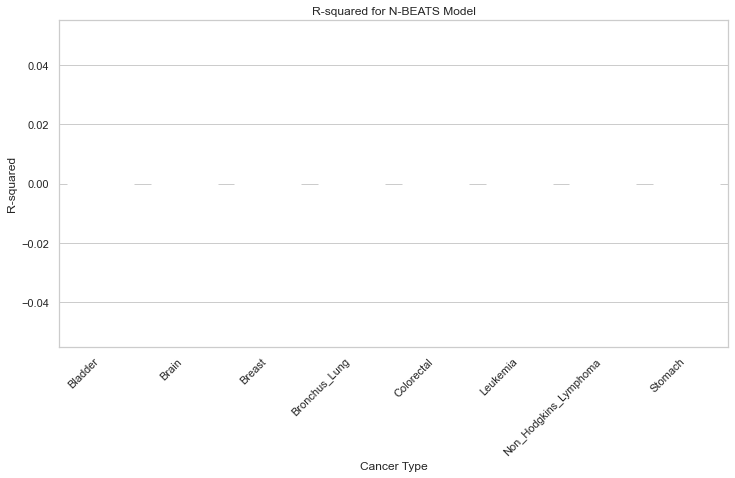

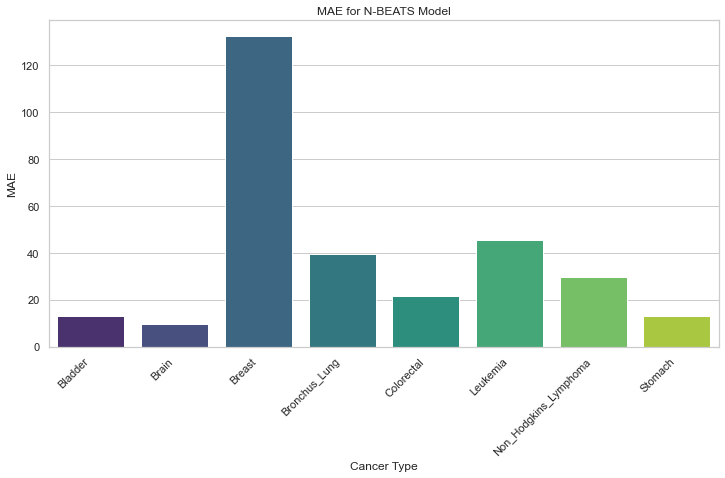

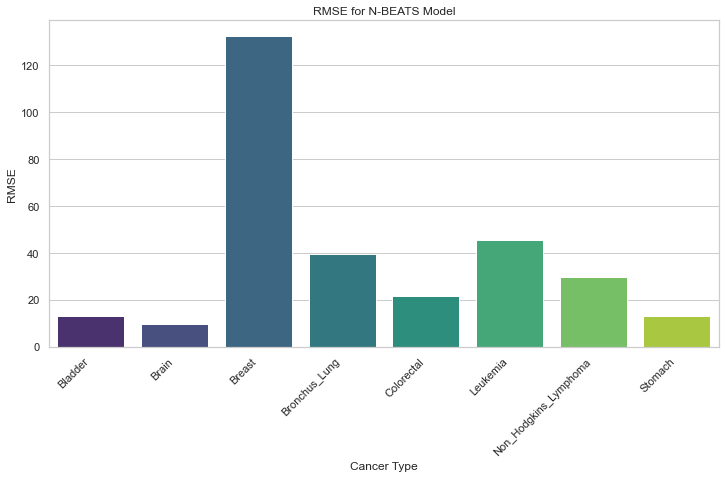

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=['Cancer_Type', 'Model', 'Metric', 'Value'])

# Initialize lists to store evaluation metrics
eval_metrics = []

# Perform the same model evaluation for each cancer type with missing data
for cancer_type in cancer_columns:
    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Handle missing values by imputing with the mean of the available values
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Train and evaluate N-BEATS model
    forecast = train_and_predict_nbeats(target_scaled)

    # Evaluate N-BEATS model
    print(f"\nEvaluation for Cancer Type: {cancer_type}")
    print("True Values (Original Scale):", target[-1])
    print("Forecasted Values (Original Scale):", forecast)

    # Calculate and store metrics
    mse = mean_squared_error(target[-1], forecast)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(target[-1], forecast)
    
    # Handle R-squared being 'nan'
    r2 = r2_score(target[-1], forecast)
    r2 = 0.0 if np.isnan(r2) else r2

    model_name = "N-BEATS"
    eval_metrics.append((cancer_type, model_name, rmse, mae, r2))
    
    # Append results to DataFrame
    results_df = results_df.append({
        'Cancer_Type': cancer_type,
        'Model': model_name,
        'Metric': 'RMSE',
        'Value': rmse
    }, ignore_index=True)
    results_df = results_df.append({
        'Cancer_Type': cancer_type,
        'Model': model_name,
        'Metric': 'MAE',
        'Value': mae
    }, ignore_index=True)
    results_df = results_df.append({
        'Cancer_Type': cancer_type,
        'Model': model_name,
        'Metric': 'R_Squared',
        'Value': r2
    }, ignore_index=True)

# Plotting R-squared
plt.figure(figsize=(12, 6))
plt.title("R-squared for N-BEATS Model")
sns.barplot(x='Cancer_Type', y='Value', data=results_df[results_df['Metric'] == 'R_Squared'], palette='viridis')
plt.xlabel("Cancer Type")
plt.ylabel("R-squared")
plt.xticks(rotation=45, ha='right')
plt.savefig('N_BEATS_R_squared.png')
plt.show()

# Plotting MAE
plt.figure(figsize=(12, 6))
plt.title("MAE for N-BEATS Model")
sns.barplot(x='Cancer_Type', y='Value', data=results_df[results_df['Metric'] == 'MAE'], palette='viridis')
plt.xlabel("Cancer Type")
plt.ylabel("MAE")
plt.xticks(rotation=45, ha='right')
plt.savefig('N_BEATS_MAE.png')
plt.show()

# Plotting RMSE
plt.figure(figsize=(12, 6))
plt.title("RMSE for N-BEATS Model")
sns.barplot(x='Cancer_Type', y='Value', data=results_df[results_df['Metric'] == 'RMSE'], palette='viridis')
plt.xlabel("Cancer Type")
plt.ylabel("RMSE")
plt.xticks(rotation=45, ha='right')
plt.savefig('N_BEATS_RMSE.png')
plt.show()


In [30]:
results_df

,Cancer_Type,Model,Metric,Value
0,Bladder,N-BEATS,RMSE,13.190031
1,Bladder,N-BEATS,MAE,13.190031
2,Bladder,N-BEATS,R_Squared,0.000000
3,Brain,N-BEATS,RMSE,9.534753
4,Brain,N-BEATS,MAE,9.534753
5,Brain,N-BEATS,R_Squared,0.000000
6,Breast,N-BEATS,RMSE,132.521232
7,Breast,N-BEATS,MAE,132.521232
8,Breast,N-BEATS,R_Squared,0.000000
9,Bronchus_Lung,N-BEATS,RMSE,39.670477


In [33]:
results_df

,Cancer_Type,Model,RMSE,MAE,R_Squared,Training_Time
0,Bladder,LinearRegression,0.169472,0.159666,-1.873281,0.003989
1,Bladder,SVR,0.321630,0.286127,-9.348903,0.005046
2,Bladder,AdaBoostRegressor,0.435470,0.369898,-17.971354,0.093805
3,Bladder,RandomForestRegressor,0.302408,0.259562,-8.148885,0.134899
4,Bladder,GradientBoostingRegressor,0.437191,0.374491,-18.121581,0.052799
...,...,...,...,...,...,...
75,Stomach,LSTM,0.304196,0.274674,-2.796200,2.508870
76,Stomach,Stacked LSTM,0.370588,0.346731,-4.634101,5.317731
77,Stomach,Bidirectional LSTM,0.344364,0.319462,-3.864955,5.493212
78,Stomach,GRU,0.418141,0.395722,-6.172789,2.698546


1/1 [==============================] - 0s 297ms/step

Evaluation for Cancer Type: Bladder
True Values (Original Scale): [13]
Forecasted Values (Original Scale): [-0.24905846]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 316ms/step

Evaluation for Cancer Type: Brain
True Values (Original Scale): [9]
Forecasted Values (Original Scale): [-1.5871868]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 326ms/step

Evaluation for Cancer Type: Breast
True Values (Original Scale): [133]
Forecasted Values (Original Scale): [0.41882396]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 311ms/step

Evaluation for Cancer Type: Bronchus_Lung
True Values (Original Scale): [39]
Forecasted Values (Original Scale): [-0.664654]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 300ms/step

Evaluation for Cancer Type: Colorectal
True Values (Original Scale): [21]
Forecasted Values (Original Scale): [-0.670535]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 303ms/step

Evaluation for Cancer Type: Leukemia
True Values (Original Scale): [46]
Forecasted Values (Original Scale): [0.29373592]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 310ms/step

Evaluation for Cancer Type: Non_Hodgkins_Lymphoma
True Values (Original Scale): [30]
Forecasted Values (Original Scale): [0.33835995]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


1/1 [==============================] - 0s 307ms/step

Evaluation for Cancer Type: Stomach
True Values (Original Scale): [12]
Forecasted Values (Original Scale): [-1.3892299]


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Storm\AppData\Local\Temp/ipykernel_16096/1279917113.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


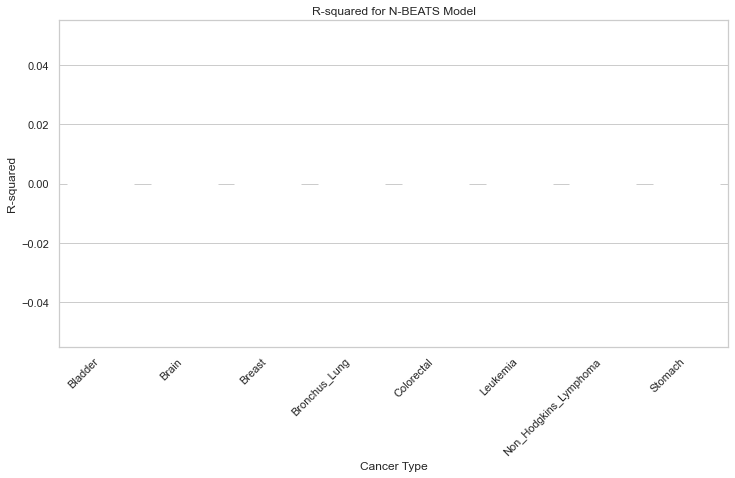

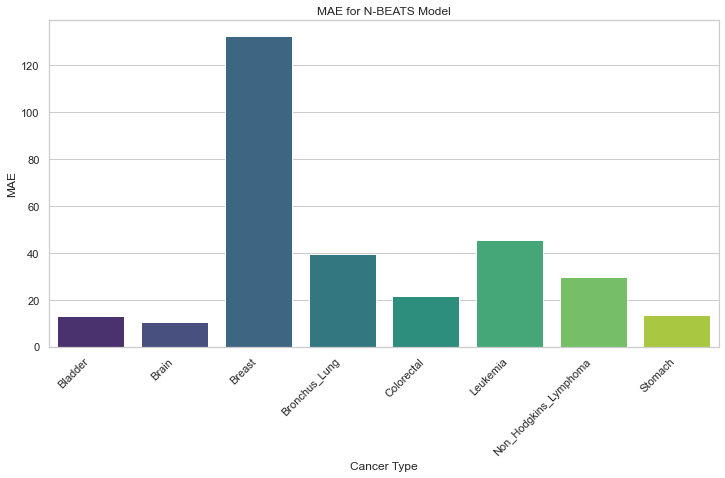

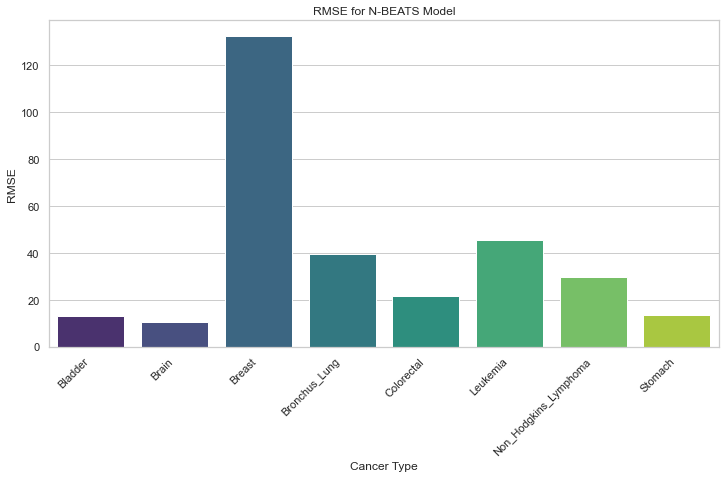

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=['Cancer_Type', 'Model', 'Metric', 'Value'])

# Initialize lists to store evaluation metrics
eval_metrics = []

# Perform the same model evaluation for each cancer type with missing data
for cancer_type in cancer_columns:
    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Handle missing values by imputing with the mean of the available values
    target = np.nan_to_num(target, nan=np.nanmean(target))

    # Normalize the target variable
    scaler = StandardScaler()
    target_scaled = scaler.fit_transform(target)

    # Train and evaluate N-BEATS model
    forecast = train_and_predict_nbeats(target_scaled)

    # Evaluate N-BEATS model
    print(f"\nEvaluation for Cancer Type: {cancer_type}")
    print("True Values (Original Scale):", target[-1])
    print("Forecasted Values (Original Scale):", forecast)

    # Calculate and store metrics
    mse = mean_squared_error(target[-1], forecast)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(target[-1], forecast)
    
    # Handle R-squared being 'nan'
    r2 = r2_score(target[-1], forecast)
    r2 = 0.0 if np.isnan(r2) else r2

    model_name = "N-BEATS"
    eval_metrics.append((cancer_type, model_name, rmse, mae, r2))
    
    # Append results to DataFrame
    results_df = results_df.append({
        'Cancer_Type': cancer_type,
        'Model': model_name,
        'Metric': 'RMSE',
        'Value': rmse
    }, ignore_index=True)
    results_df = results_df.append({
        'Cancer_Type': cancer_type,
        'Model': model_name,
        'Metric': 'MAE',
        'Value': mae
    }, ignore_index=True)
    results_df = results_df.append({
        'Cancer_Type': cancer_type,
        'Model': model_name,
        'Metric': 'R_Squared',
        'Value': r2
    }, ignore_index=True)

# Plotting R-squared
plt.figure(figsize=(12, 6))
plt.title("R-squared for N-BEATS Model")
sns.barplot(x='Cancer_Type', y='Value', data=results_df[results_df['Metric'] == 'R_Squared'], palette='viridis')
plt.xlabel("Cancer Type")
plt.ylabel("R-squared")
plt.xticks(rotation=45, ha='right')
plt.savefig('N_BEATS_R_squared.png')
plt.show()

# Plotting MAE
plt.figure(figsize=(12, 6))
plt.title("MAE for N-BEATS Model")
sns.barplot(x='Cancer_Type', y='Value', data=results_df[results_df['Metric'] == 'MAE'], palette='viridis')
plt.xlabel("Cancer Type")
plt.ylabel("MAE")
plt.xticks(rotation=45, ha='right')
plt.savefig('N_BEATS_MAE.png')
plt.show()

# Plotting RMSE
plt.figure(figsize=(12, 6))
plt.title("RMSE for N-BEATS Model")
sns.barplot(x='Cancer_Type', y='Value', data=results_df[results_df['Metric'] == 'RMSE'], palette='viridis')
plt.xlabel("Cancer Type")
plt.ylabel("RMSE")
plt.xticks(rotation=45, ha='right')
plt.savefig('N_BEATS_RMSE.png')
plt.show()


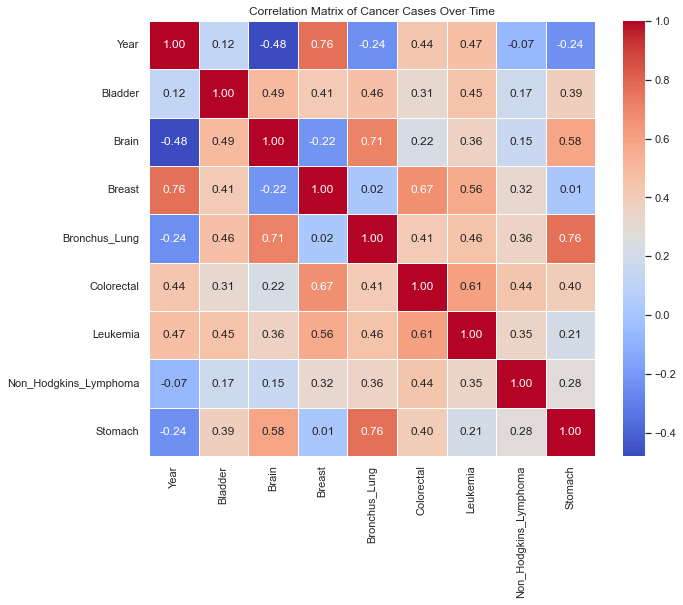

Correlation Statistics:
          level_0        level_1  Correlation
3            Year         Breast     0.764204
27         Breast           Year     0.764204
44  Bronchus_Lung        Stomach     0.763868
76        Stomach  Bronchus_Lung     0.763868
22          Brain  Bronchus_Lung     0.706862
..            ...            ...          ...
8            Year        Stomach    -0.239955
36  Bronchus_Lung           Year    -0.244977
4            Year  Bronchus_Lung    -0.244977
2            Year          Brain    -0.479682
18          Brain           Year    -0.479682

[72 rows x 3 columns]


In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess the new dataset
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of Cancer Cases Over Time")
plt.show()

# Display correlation statistics
correlation_statistics = data.corr().stack().reset_index().rename(columns={0: 'Correlation'})
correlation_statistics = correlation_statistics[correlation_statistics['level_0'] != correlation_statistics['level_1']]
correlation_statistics = correlation_statistics.sort_values(by='Correlation', ascending=False)

print("Correlation Statistics:")
print(correlation_statistics)


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, GRU
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import time

# Set a random seed for reproducibility
np.random.seed(42)

# Load and preprocess the new dataset
# (Same as in the original code)

# Define the columns representing cancer types
# (Same as in the original code)

# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=['Cancer_Type', 'Model', 'RMSE', 'MAE', 'R_Squared', 'Training_Time'])

for cancer_type in cancer_columns:
    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Normalize the target variable
    scaler = MinMaxScaler(feature_range=(0, 1))
    target_scaled = scaler.fit_transform(target)

    # Split the data into training and testing sets
    # (Same as in the original code)

    # Split into input and output variables
    # (Same as in the original code)

    # Define the regression models to be evaluated
    models = [
        LinearRegression(),
        SVR(),
        AdaBoostRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor()
    ]

    print(f"Predicting {cancer_type}:")

    # Train and evaluate each model
    for model in models:
        start_time = time.time()

        # Define a generic hyperparameter grid for each algorithm
        param_grid = {}

        if isinstance(model, LinearRegression):
            pass  # No hyperparameters to tune for Linear Regression

        elif isinstance(model, SVR):
            param_grid = {
                'C': [0.1, 1, 10],
                'kernel': ['linear', 'poly', 'rbf']
            }

        elif isinstance(model, AdaBoostRegressor):
            param_grid = {
                'n_estimators': [50, 100, 150],
                #'learning_rate': [0.01, 0.1, 0.2],
                #'loss': ['linear', 'square', 'exponential']
            }

        elif isinstance(model, RandomForestRegressor):
            param_grid = {
                'n_estimators': [50, 100, 150],
                'max_depth': [None, 10, 20, 30],
                #'min_samples_split': [2, 5, 10],
                #'min_samples_leaf': [1, 2, 4]
            }

        elif isinstance(model, GradientBoostingRegressor):
            param_grid = {
                'n_estimators': [50, 100, 150],
                'learning_rate': [0.01, 0.1, 0.2],
                #'max_depth': [3, 5, 7],
                #'min_samples_split': [2, 5, 10],
                #'min_samples_leaf': [1, 2, 4]
            }

        if param_grid:
            grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
            grid_search.fit(X_train, y_train.ravel())
            model = grid_search.best_estimator_

        # Train the model with the best hyperparameters
        model.fit(X_train, y_train.ravel())

        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        training_time = time.time() - start_time

        model_name = model.__class__.__name__
        print(f"{model_name} RMSE: {rmse}")
        print(f"{model_name} MAE: {mae}")
        print(f"{model_name} R-squared: {r2}")
        print(f"{model_name} Training Time: {training_time}")
        print()

        # Append results to the DataFrame
        results_df = results_df.append({
            'Cancer_Type': cancer_type,
            'Model': model_name,
            'RMSE': rmse,
            'MAE': mae,
            'R_Squared': r2,
            'Training_Time': training_time
        }, ignore_index=True)

    # Define the deep learning models to be evaluated
    deep_learning_models = [
        (Sequential([LSTM(32, input_shape=(X_train.shape[1], 1)), Dense(1)]), "LSTM"),
        (Sequential([LSTM(32, input_shape=(X_train.shape[1], 1), return_sequences=True), LSTM(32), Dense(1)]), "Stacked LSTM"),
        (Sequential([Bidirectional(LSTM(32), input_shape=(X_train.shape[1], 1)), Dense(1)]), "Bidirectional LSTM"),
        (Sequential([GRU(32, input_shape=(X_train.shape[1], 1)), Dense(1)]), "GRU")
    ]

    # Train and evaluate each deep learning model
    for model, model_name in deep_learning_models:
        start_time = time.time()
        model.compile(loss='mse', optimizer='adam')
        model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=1, verbose=0)
        predictions = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        training_time = time.time() - start_time

        print(f"{model_name} RMSE: {rmse}")
        print(f"{model_name} MAE: {mae}")
        print(f"{model_name} R-squared: {r2}")
        print(f"{model_name} Training Time: {training_time}")
        print()

        # Append results to the DataFrame
        results_df = results_df.append({
            'Cancer_Type': cancer_type,
            'Model': model_name,
            'RMSE': rmse,
            'MAE': mae,
            'R_Squared': r2,
            'Training_Time': training_time
        }, ignore_index=True)

    # Exponential Smoothing
    # (Same as in the original code)

    # Save the results DataFrame to a CSV file
    results_df.to_csv('cancer_prediction_results.csv', index=False)


C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


NameError: name 'cancer_columns' is not defined